# **Fireworks Galaxy Observation**

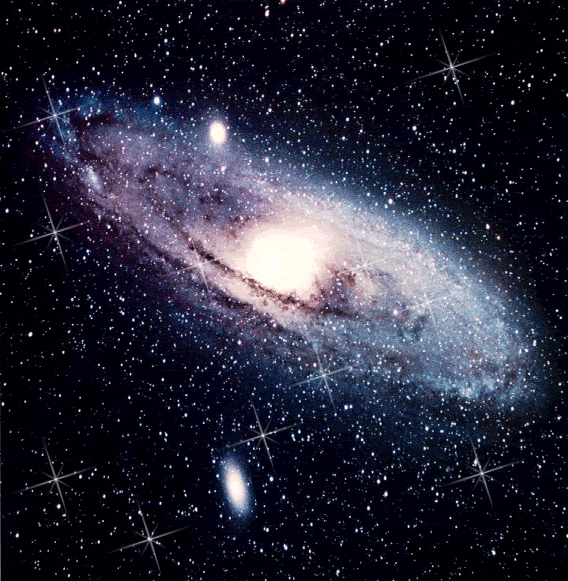

## Importing Important Libraries

In [ ]:
#GENERAL

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
import random
import time

In [ ]:
#PATH PROCESS

import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import astropy
from astropy import units as u 
import astropy.wcs as fitswcs
#from specutils import Spectrum1D, SpectralRegion
from astropy.cosmology import WMAP9 as Cosmology

In [ ]:
#IMAGE PROCESS

from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage.morphology as morph
import skimage.exposure as skie
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches

In [ ]:
#SCALER & TRANSFORMATION

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
import sklearn


from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy import signal
from scipy.fft import fftshift


In [ ]:
#IGNORING WARNINGS

from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=RuntimeWarning)

#### **Mount Drive and Read the data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip /content/gdrive/MyDrive/GALAXIES_CENTER.zip

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/MyDrive/GALAXIES_CENTER.zip
replace M100/ISO/csli23500615.fits? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### Load data from different telescopes and instruments

In [ ]:
NEAR_INFRARED_PATH = "/content/NGC6946/NEAR_INFRARED/n4k48nbsq_cal.fits"
HST_OPTICAL_PATH = "/content/NGC6946/OPTICAL/HST/idk404050/idk404050_drc.fits"
XMM_NEWTON_PATH = "/content/NGC6946/XMM_NEWTON_Soft_Xray/P0200670301EPX0003COLIM8000.FTZ"
XMM_OM_PATH = "/content/NGC6946/XMM_OM_Optical/P0200670301OMX000LSIMAGB000.FTZ"
ISO_PATH = "/content/NGC6946/ISO/csp3390040401.fits"

#### Reading the individual Astronomical Instrument's data

In [ ]:
NI_OPEN = fits.open(NEAR_INFRARED_PATH)
HST_OPEN = fits.open(HST_OPTICAL_PATH)
XMM_NEWTON_OPEN = fits.open(XMM_NEWTON_PATH)
XMM_OM_OPEN = fits.open(XMM_OM_PATH)
ISO_OPEN = fits.open(ISO_PATH)

#### Slicing the images to a specific scale and centering

In [ ]:
NI_SCI = NI_OPEN[1].data
HST_SCI = HST_OPEN[1].data
NEWTON_RAW = XMM_NEWTON_OPEN[1].data
OM_PRIMARY = XMM_OM_OPEN[0].data
ISO_PRIMARY = ISO_OPEN[0].data

WIDE_SCALE_NI = NI_SCI[90:,60:220]
ZOOMED_SCALE_NI = NI_SCI[150:,95:195]
NUCLEUS_SCALE_NI = NI_SCI[190:220,120:165]

WIDE_SCALE_HST = HST_SCI[700:4000,700:4000]
ZOOMED_SCALE_HST = HST_SCI[1800:3400,1700:3200]
ZOOMED_X2_SCALE_HST = HST_SCI[2100:3100,2000:3000]
ZOOMED_X3_SCALE_HST = HST_SCI[2450:2850,2300:2700]
NUCLEUS_SCALE_HST = HST_SCI[2640:2850,2330:2650]

WIDE_SCALE_NEWTON = NEWTON_RAW[2][155:480,160:440]
ZOOMED_SCALE_NEWTON = NEWTON_RAW[2][200:400,200:380]
NUCLEUS_SCALE_NEWTON = NEWTON_RAW[2][270:370,240:340]

WIDE_SCALE_OM = OM_PRIMARY[480:1070,350:1195]
ZOOMED_SCALE_OM = OM_PRIMARY[370:1055,420:1070]
NUCLEUS_SCALE_OM = OM_PRIMARY[500:950,500:950]

ISO_CONS_SCALE = ISO_PRIMARY[1][:,7:22]

#### Defining spectral list with some new additions

In [ ]:
SPECTRAL_LIST = ["gray","jet","hot","prism","nipy_spectral",
             "gist_ncar","gist_earth","gist_stern","flag","gnuplot2",'terrain']

## Exploring different Filters for Edge detection

#### 1. SATO filter: 
```
skimage.filters.sato
```
This filter can be used to detect continuous ridges, e.g. tubes, wrinkles, rivers. It can be used to calculate the fraction of the whole image containing such objects.Defined only for 2-D and 3-D images. Calculates the eigenvectors of the Hessian to compute the similarity of an image region to tubes.

#### Parameters
```
image(N, M[, P]) ndarray
Array with input image data.

sigmasiterable of floats, optional
Sigmas used as scales of filter.

black_ridgesboolean, optional
When True (the default), the filter detects black ridges; when False, it detects white ridges.

mode{‘constant’, ‘reflect’, ‘wrap’, ‘nearest’, ‘mirror’}, optional
How to handle values outside the image borders.

cvalfloat, optional
Used in conjunction with mode ‘constant’, the value outside the image boundaries.
```
#### Returns
```
out(N, M[, P]) ndarray
Filtered image (maximum of pixels across all scales).
```


#### Applying SATO to a few sample images

In [ ]:
from skimage.filters import sato
from skimage import io
url = "https://images.fineartamerica.com/images-medium-large-5/oak-leaf-black-and-white-jennie-marie-schell.jpg"
image = io.imread(url)
sato_image = sato(image)

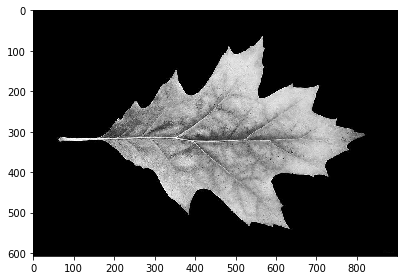

In [ ]:
io.imshow(image)

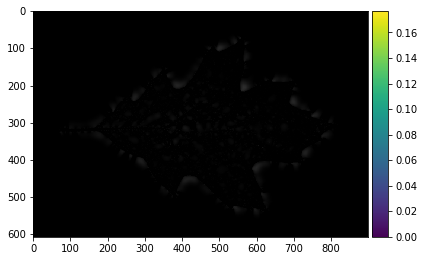

In [ ]:
io.imshow(sato_image)

In [ ]:

url = "https://cdn.shopify.com/s/files/1/1417/3230/products/IMG_0717-Maple-Leaf_1024x1024.jpg?v=1483041818"
image = io.imread(url)
sato_image = sato(image)


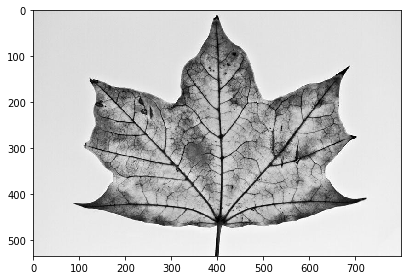

In [ ]:
io.imshow(image)

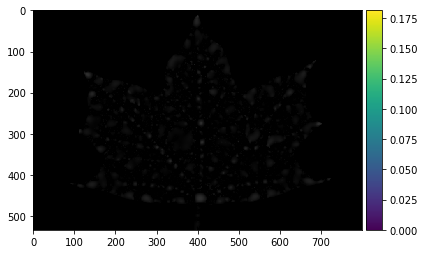

In [ ]:
io.imshow(sato_image)

#### applying the SATO filter on galaxy image

In [ ]:
SATO_WIDE_SCALE_NI = filters.sato(WIDE_SCALE_NI)
SATO_ZOOMED_SCALE_NI = filters.sato(ZOOMED_SCALE_NI)
SATO_NUCLEUS_SCALE_NI = filters.sato(NUCLEUS_SCALE_NI)

SATO_WIDE_SCALE_HST = filters.sato(WIDE_SCALE_HST)
SATO_ZOOMED_SCALE_HST = filters.sato(ZOOMED_SCALE_HST)
SATO_ZOOMED_X2_SCALE_HST = filters.sato(ZOOMED_X2_SCALE_HST)
SATO_ZOOMED_X3_SCALE_HST = filters.sato(ZOOMED_X3_SCALE_HST)
SATO_NUCLEUS_SCALE_HST = filters.sato(NUCLEUS_SCALE_HST)

SATO_WIDE_SCALE_NEWTON = filters.sato(WIDE_SCALE_NEWTON)
SATO_ZOOMED_SCALE_NEWTON = filters.sato(ZOOMED_SCALE_NEWTON)
SATO_NUCLEUS_SCALE_NEWTON = filters.sato(NUCLEUS_SCALE_NEWTON)

SATO_WIDE_SCALE_OM = filters.sato(WIDE_SCALE_OM)
SATO_ZOOMED_SCALE_OM = filters.sato(ZOOMED_SCALE_OM)
SATO_NUCLEUS_SCALE_OM = filters.sato(NUCLEUS_SCALE_OM)

SATO_ISO_CONS_SCALE = filters.sato(ISO_CONS_SCALE)

#### Visualizing the filtered images

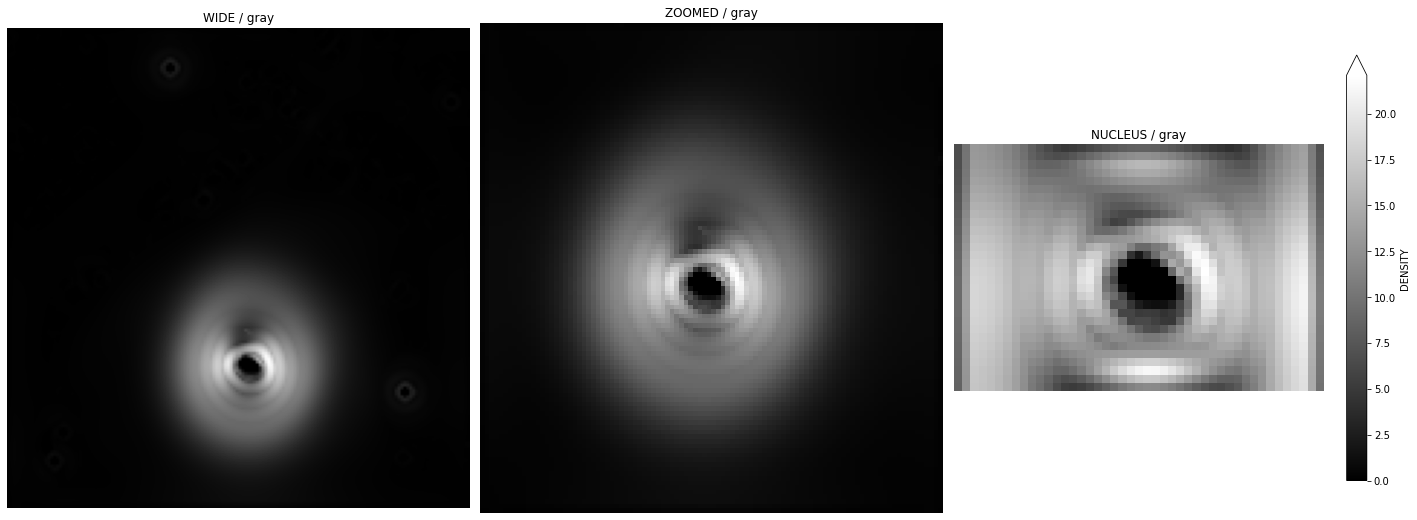

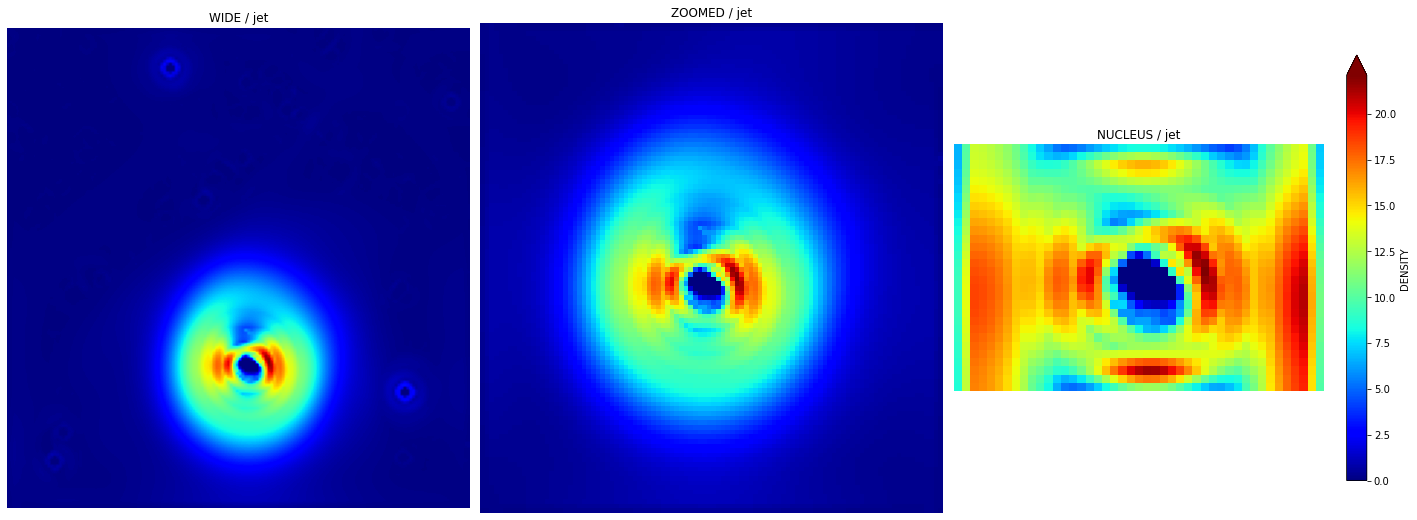

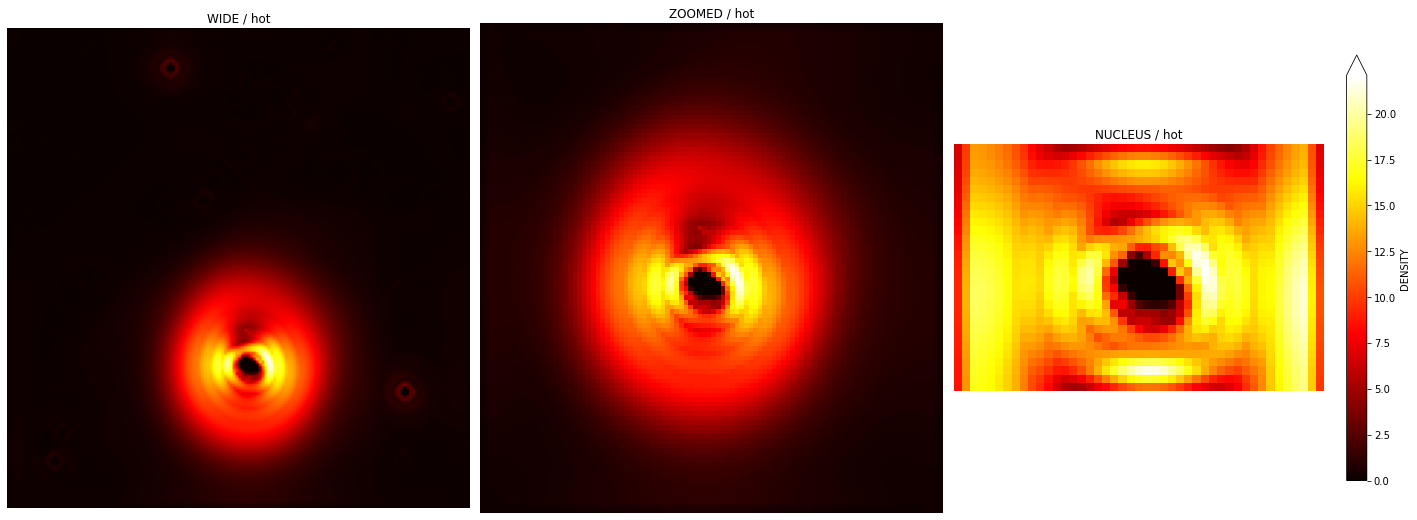

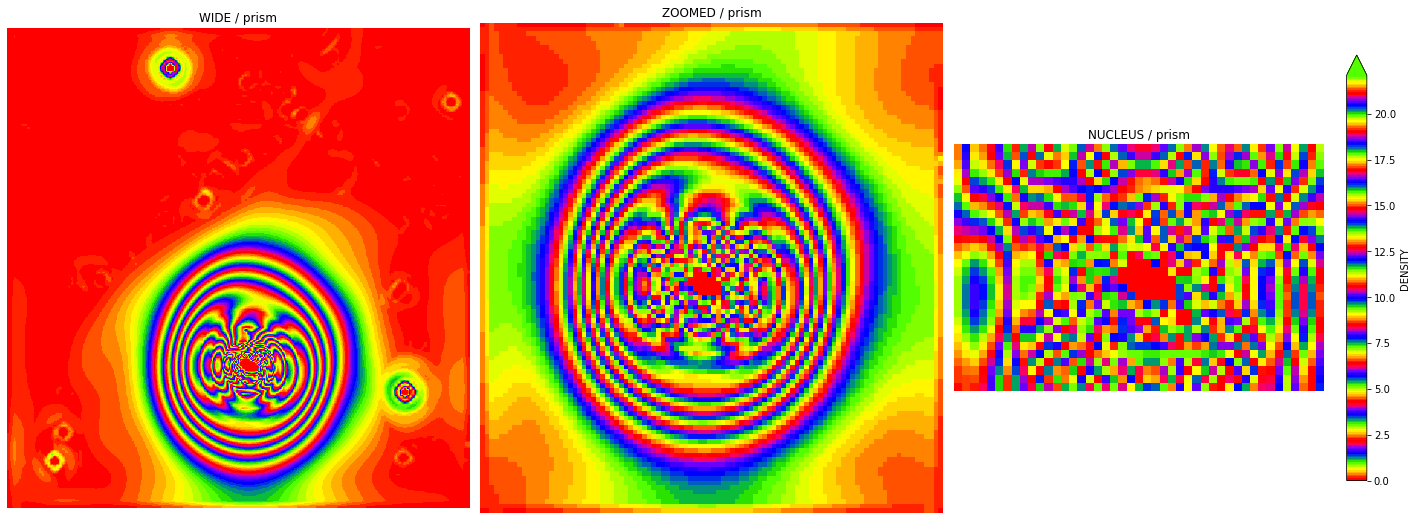

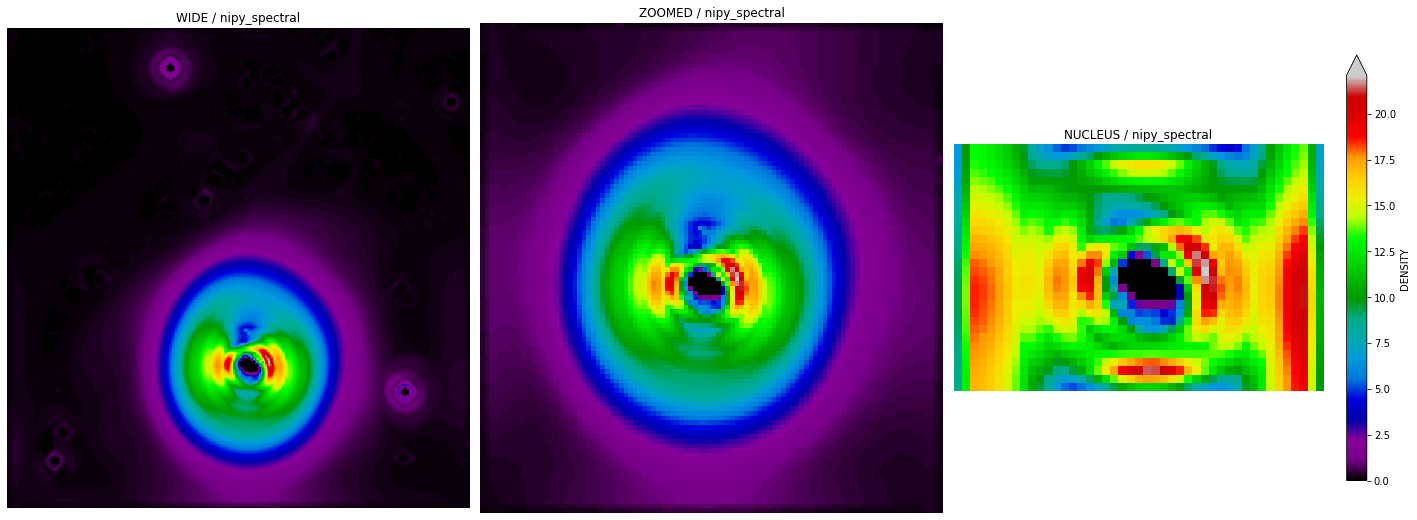

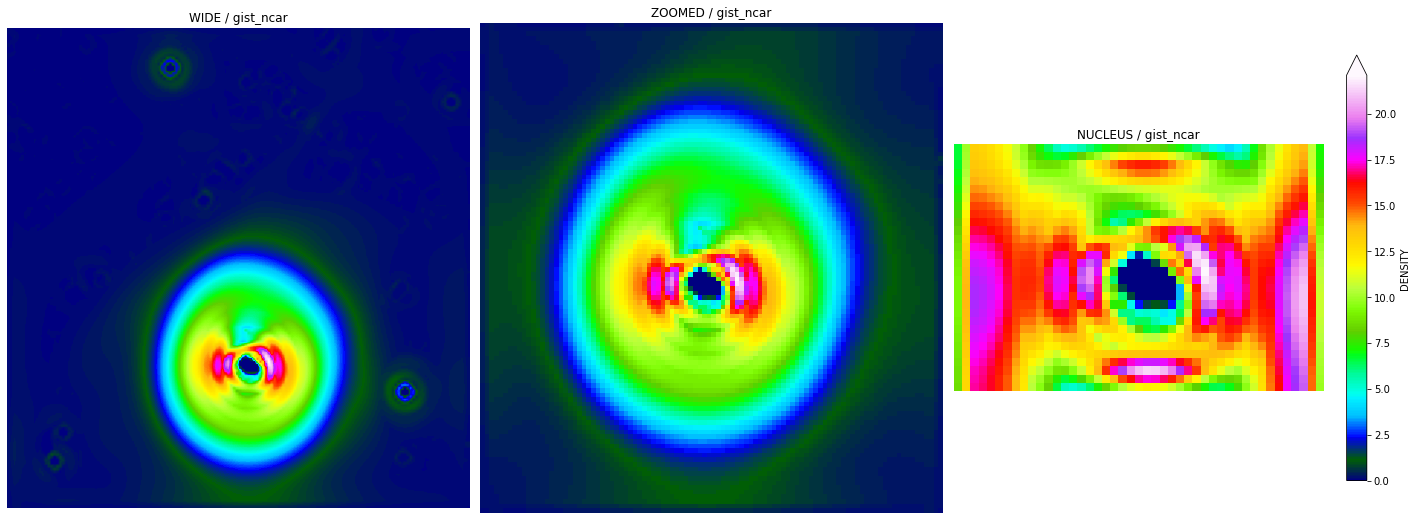

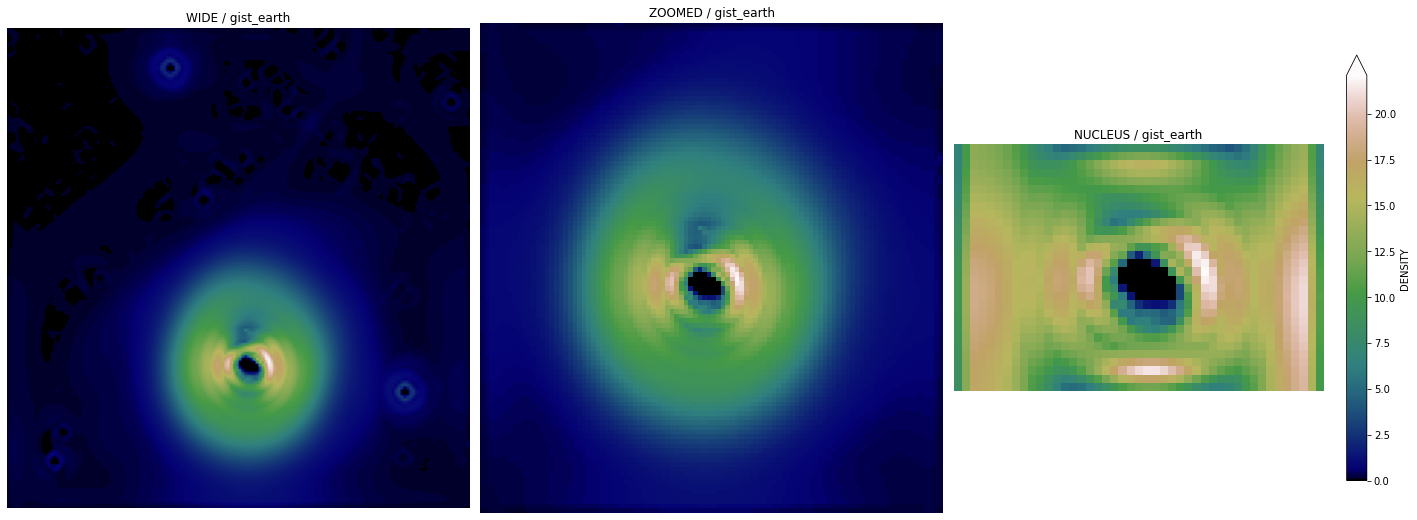

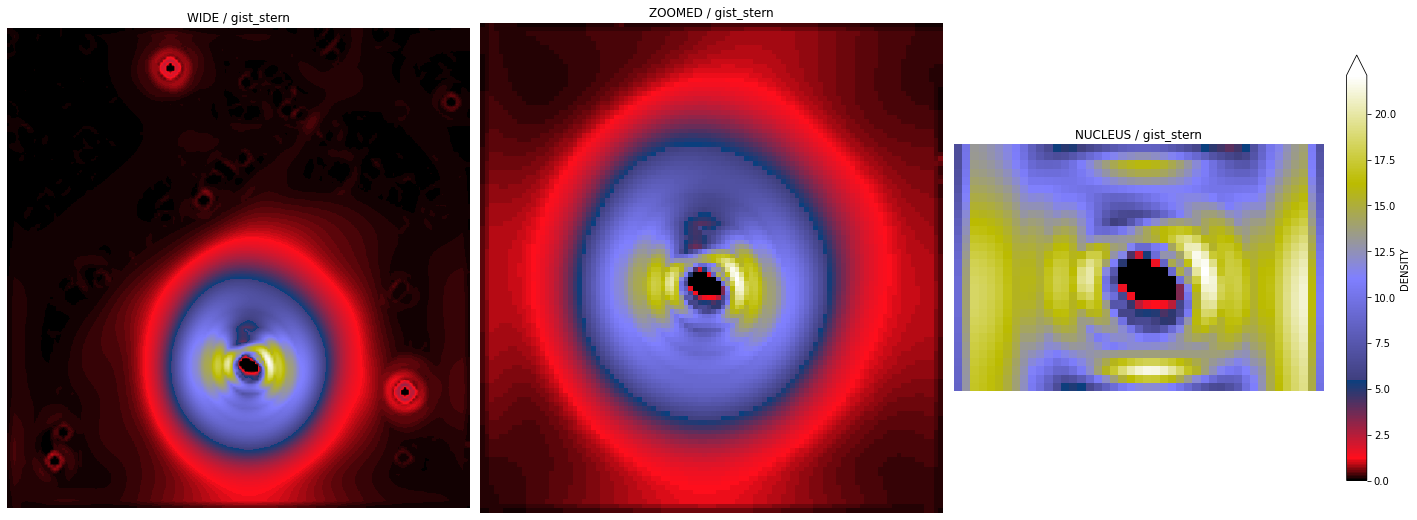

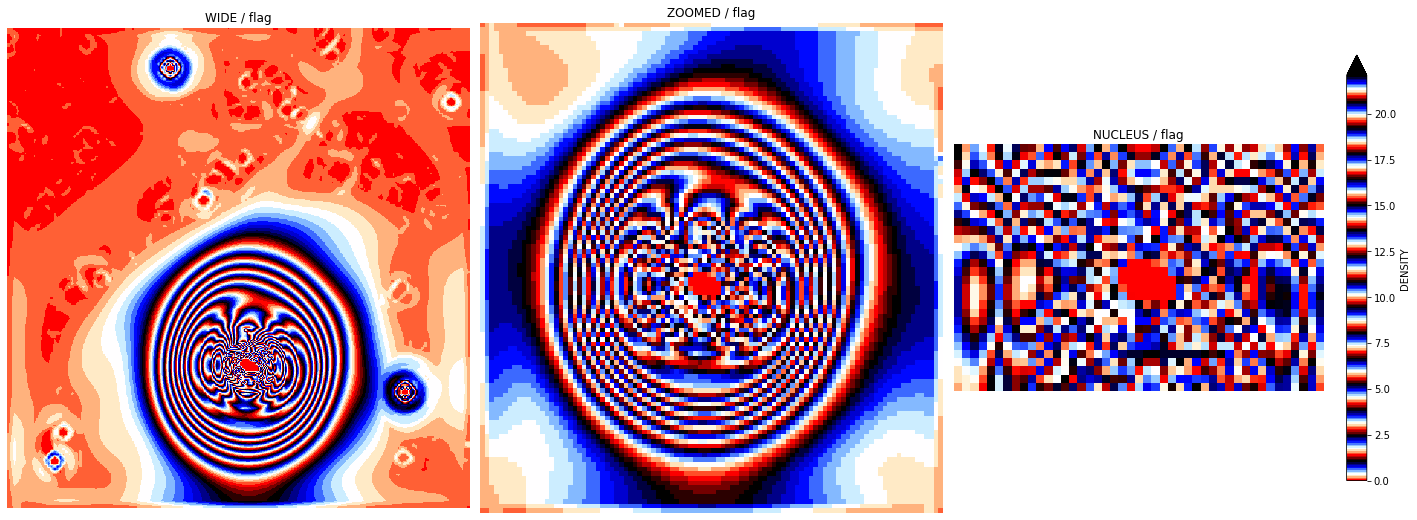

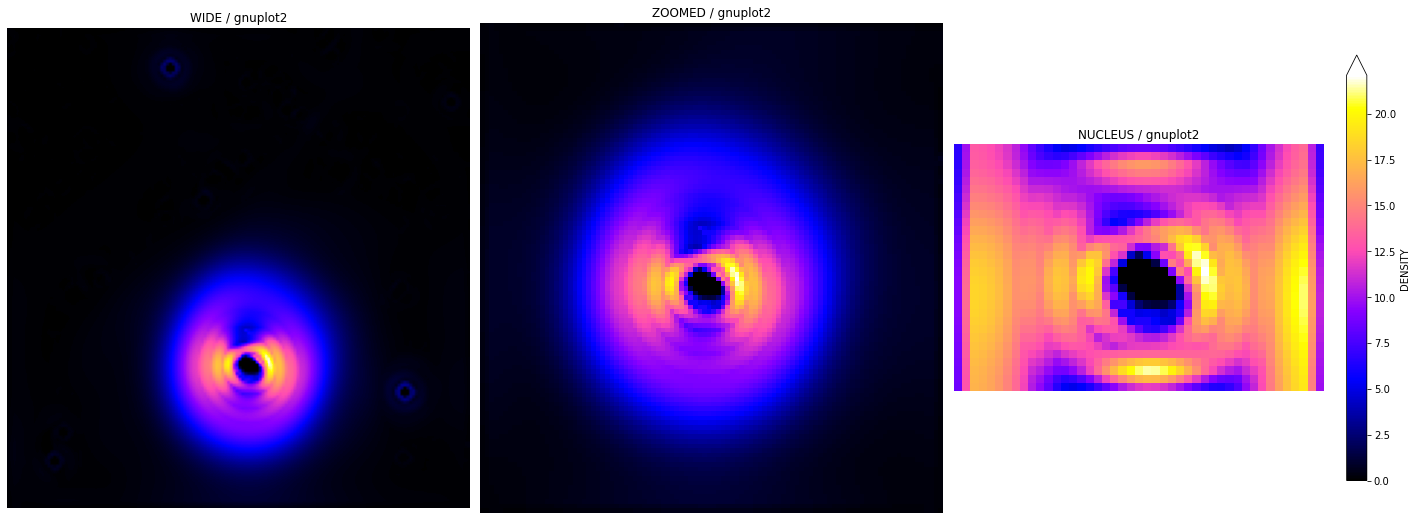

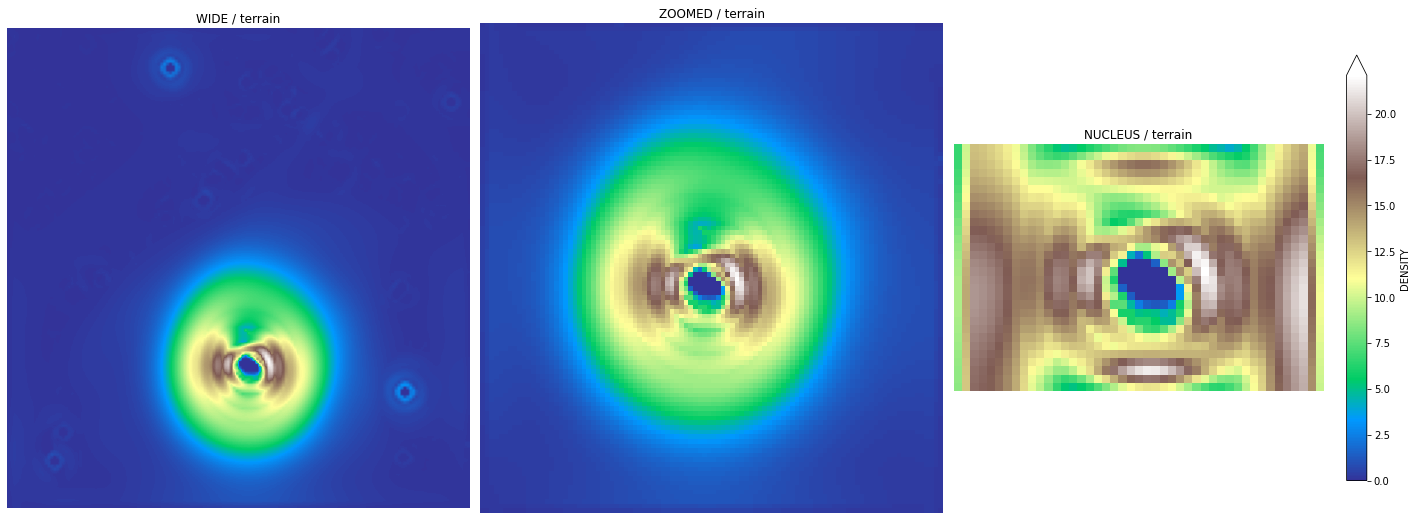

In [ ]:

for x_spec in SPECTRAL_LIST:
    
    figure,axis = plt.subplots(1,3,figsize=(20,20))
    
    axis[0].imshow(SATO_WIDE_SCALE_NI,cmap=x_spec)
    axis[0].set_title("WIDE" + " / "+ x_spec)
    axis[0].axis("off")
    
    axis[1].imshow(SATO_ZOOMED_SCALE_NI,cmap=x_spec)
    axis[1].set_title("ZOOMED" + " / "+ x_spec)
    axis[1].axis("off")
    
    DENSITY_FUNC = axis[2].imshow(SATO_NUCLEUS_SCALE_NI,cmap=x_spec)
    axis[2].set_title("NUCLEUS" + " / "+ x_spec)
    axis[2].axis("off")
    
    figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
    plt.tight_layout()
    plt.show()

#### 2. Meijering filter:
```
skimage.filters.meijering
```

This filter can be used to detect continuous ridges, e.g. neurites, wrinkles, rivers. It can be used to calculate the fraction of the whole image containing such objects.Calculates the eigenvectors of the Hessian to compute the similarity of an image region to neurites.

#### Parameters
```
image(N, M[, …, P]) ndarray
Array with input image data.

sigmasiterable of floats, optional
Sigmas used as scales of filter

alphafloat, optional
Shaping filter constant, that selects maximally flat elongated features. The default, None, selects the optimal value -1/(ndim+1).

black_ridgesboolean, optional
When True (the default), the filter detects black ridges; when False, it detects white ridges.

mode{‘constant’, ‘reflect’, ‘wrap’, ‘nearest’, ‘mirror’}, optional
How to handle values outside the image borders.

cvalfloat, optional
Used in conjunction with mode ‘constant’, the value outside the image boundaries.
```

#### Returns
```
out(N, M[, …, P]) ndarray
Filtered image (maximum of pixels across all scales).
```


#### Applying the same treatment to a sample image followed by the astronomical image

In [ ]:
from skimage.filters import meijering
from skimage import io
url = "https://www.samsastro.com/wp-content/uploads/2017/10/M31-NGC224-Andromeda-Galaxy-TMB-20090921.jpg"
image = io.imread(url)
m_image = meijering(image)

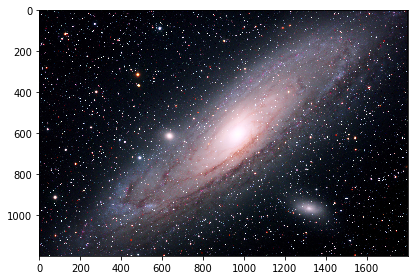

In [ ]:
io.imshow(image)

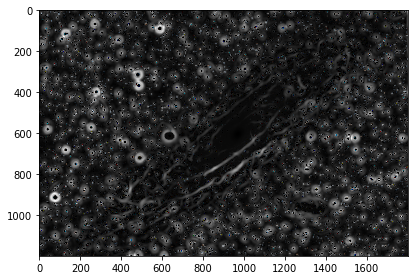

In [ ]:
io.imshow(m_image)

In [ ]:
M_WIDE_SCALE_NI = filters.meijering(WIDE_SCALE_NI)
M_ZOOMED_SCALE_NI = filters.meijering(ZOOMED_SCALE_NI)
M_NUCLEUS_SCALE_NI = filters.meijering(NUCLEUS_SCALE_NI)

M_WIDE_SCALE_HST = filters.meijering(WIDE_SCALE_HST)
M_ZOOMED_SCALE_HST = filters.meijering(ZOOMED_SCALE_HST)
M_ZOOMED_X2_SCALE_HST = filters.meijering(ZOOMED_X2_SCALE_HST)
M_ZOOMED_X3_SCALE_HST = filters.meijering(ZOOMED_X3_SCALE_HST)
M_NUCLEUS_SCALE_HST = filters.meijering(NUCLEUS_SCALE_HST)

M_WIDE_SCALE_NEWTON = filters.meijering(WIDE_SCALE_NEWTON)
M_ZOOMED_SCALE_NEWTON = filters.meijering(ZOOMED_SCALE_NEWTON)
M_NUCLEUS_SCALE_NEWTON = filters.meijering(NUCLEUS_SCALE_NEWTON)

M_WIDE_SCALE_OM = filters.meijering(WIDE_SCALE_OM)
M_ZOOMED_SCALE_OM = filters.meijering(ZOOMED_SCALE_OM)
M_NUCLEUS_SCALE_OM = filters.meijering(NUCLEUS_SCALE_OM)

M_ISO_CONS_SCALE = filters.meijering(ISO_CONS_SCALE)

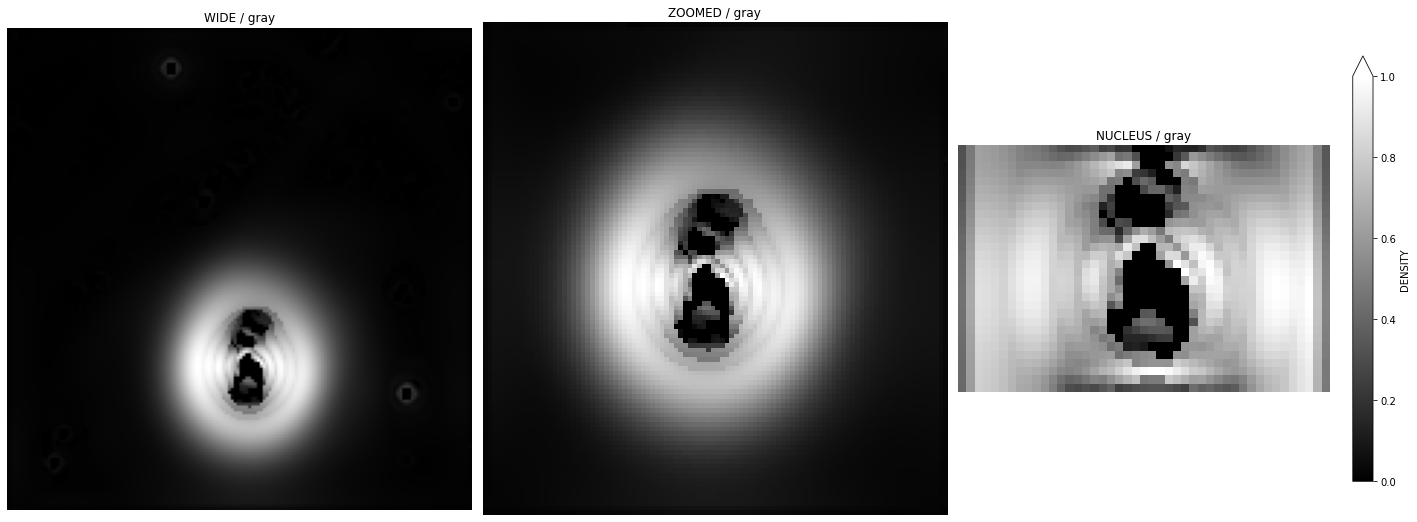

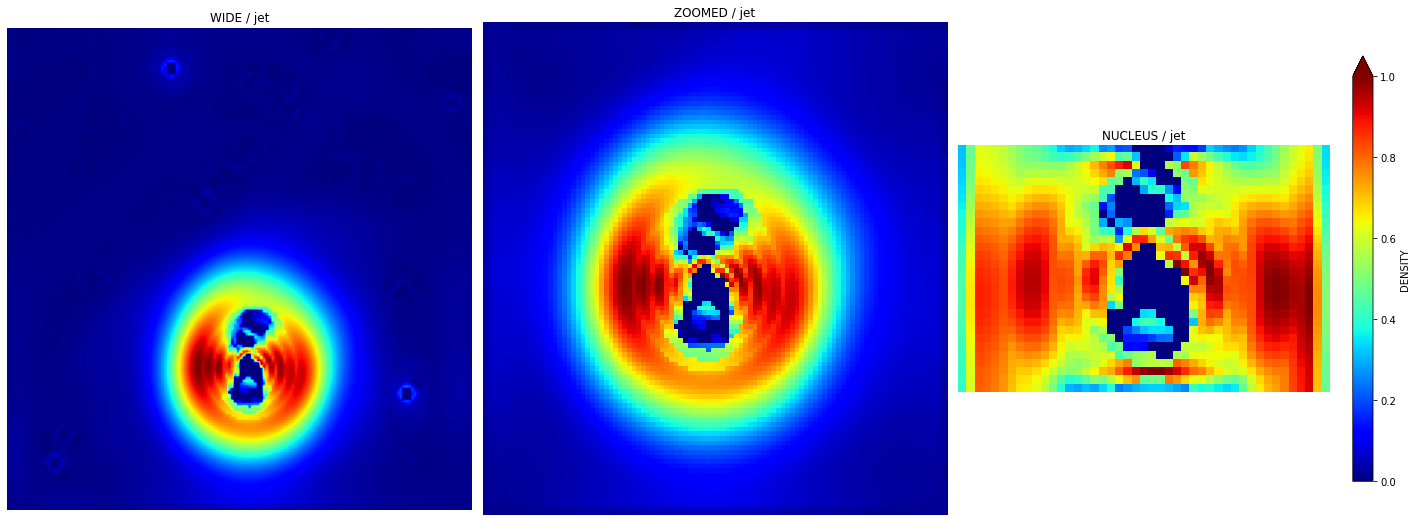

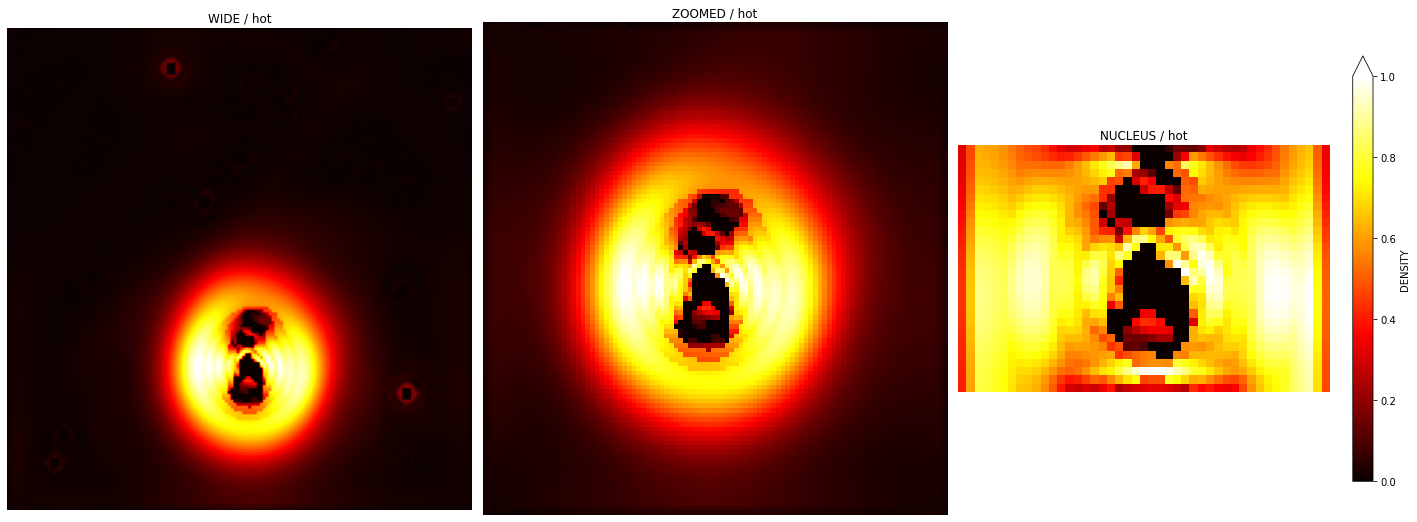

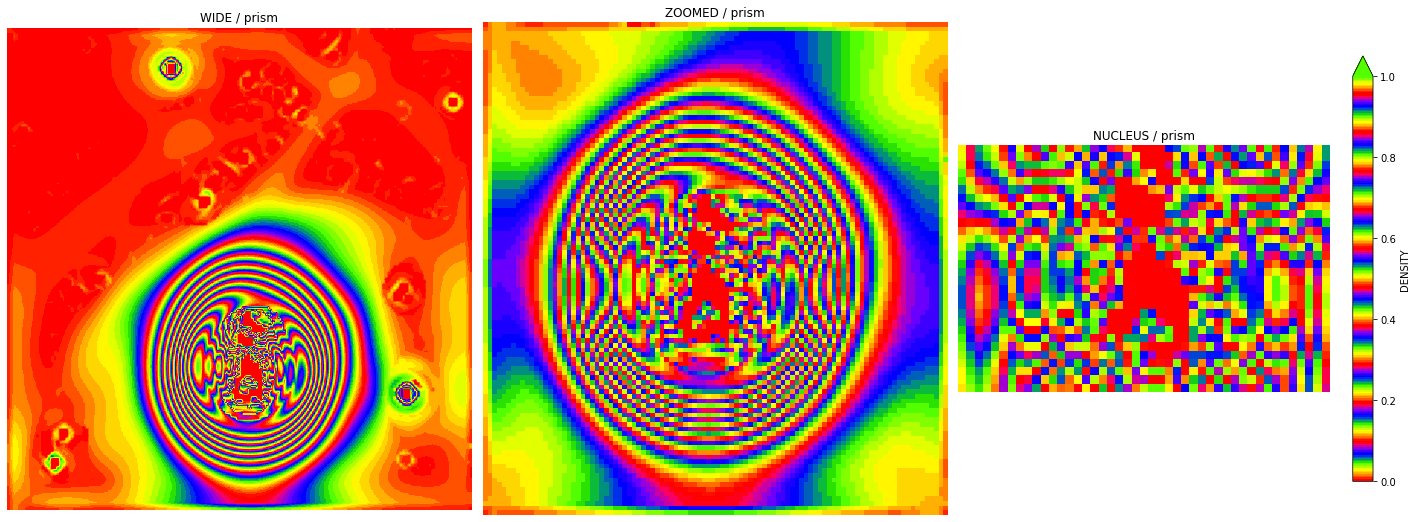

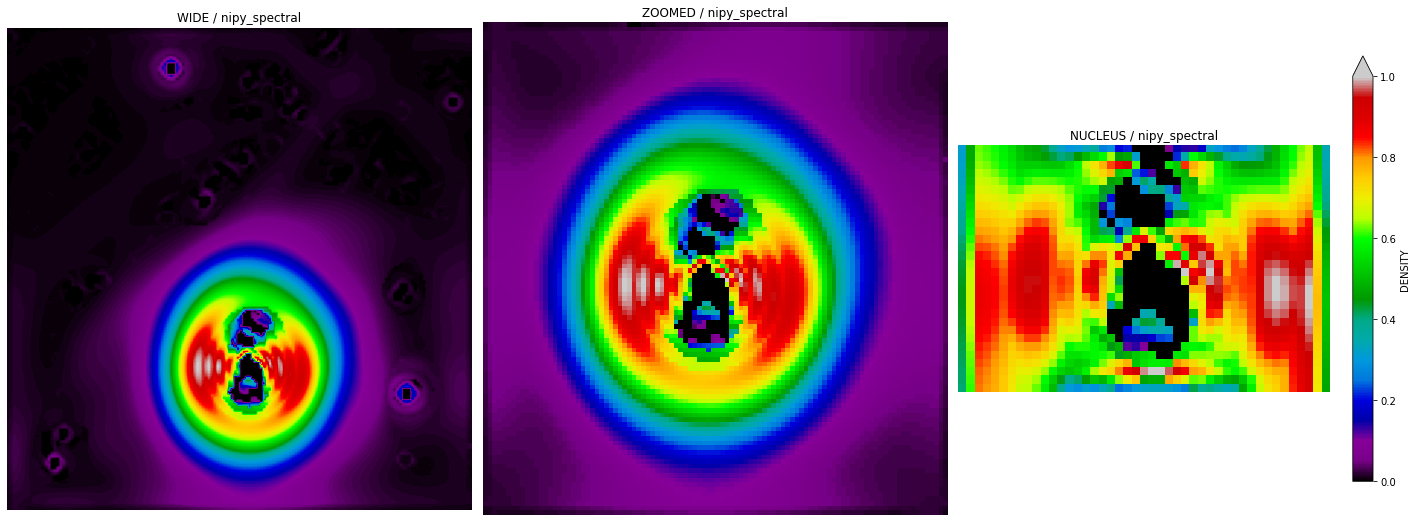

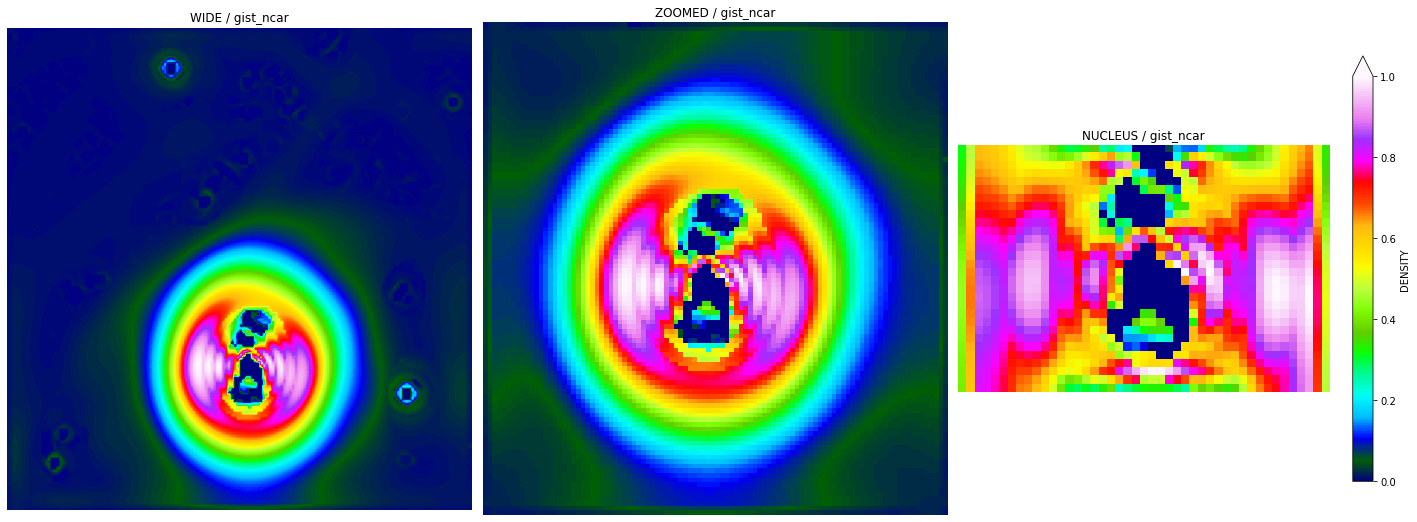

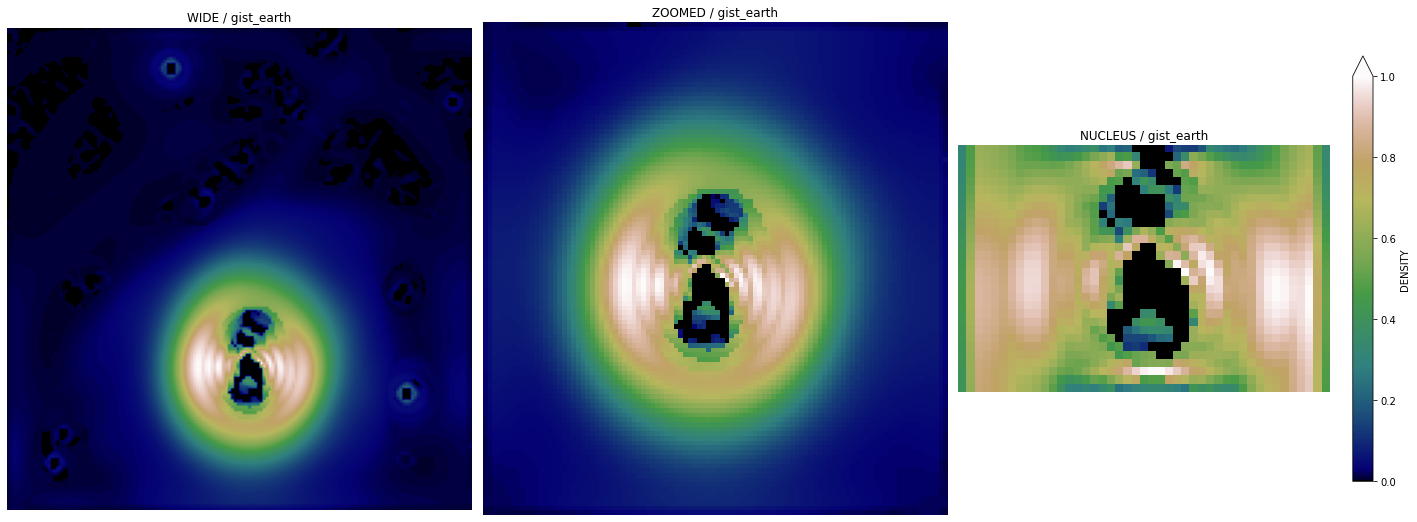

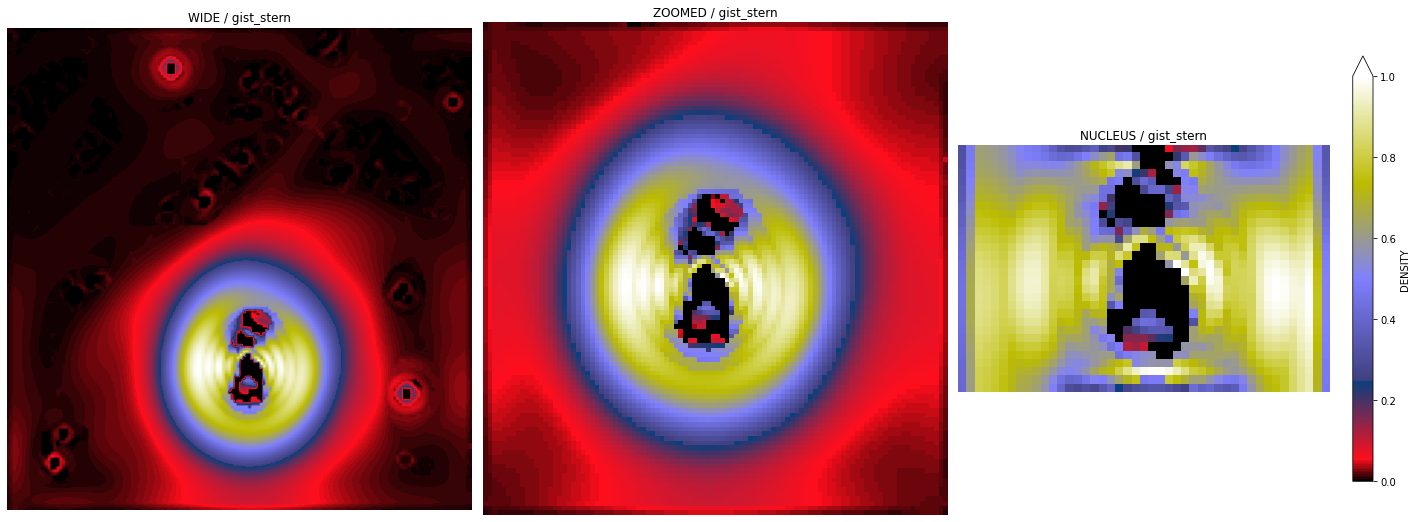

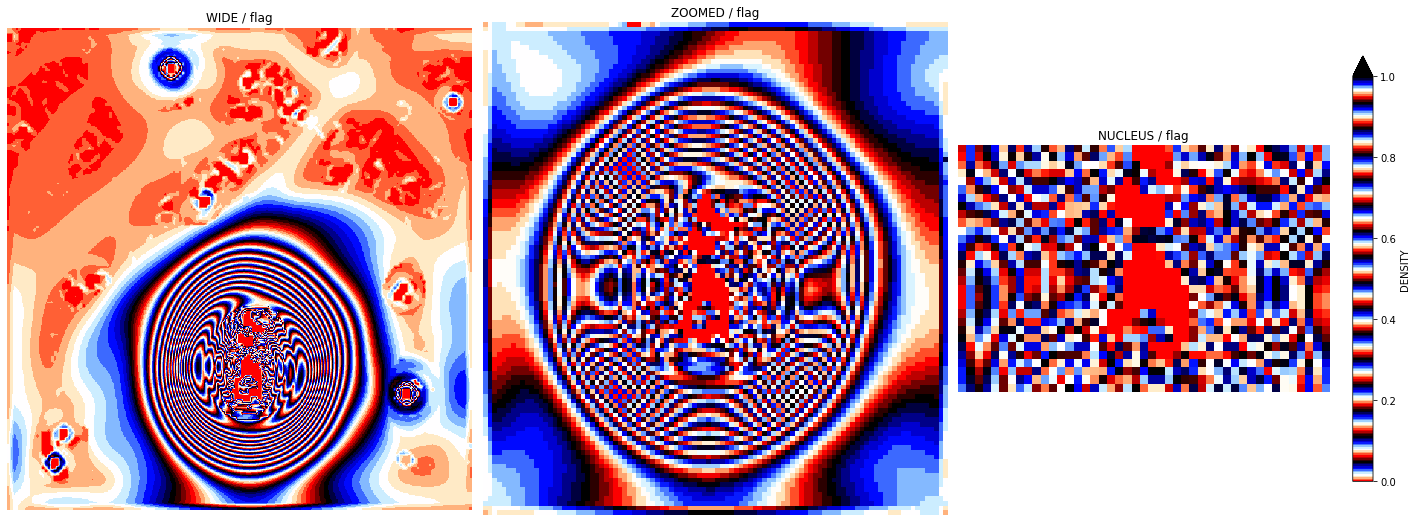

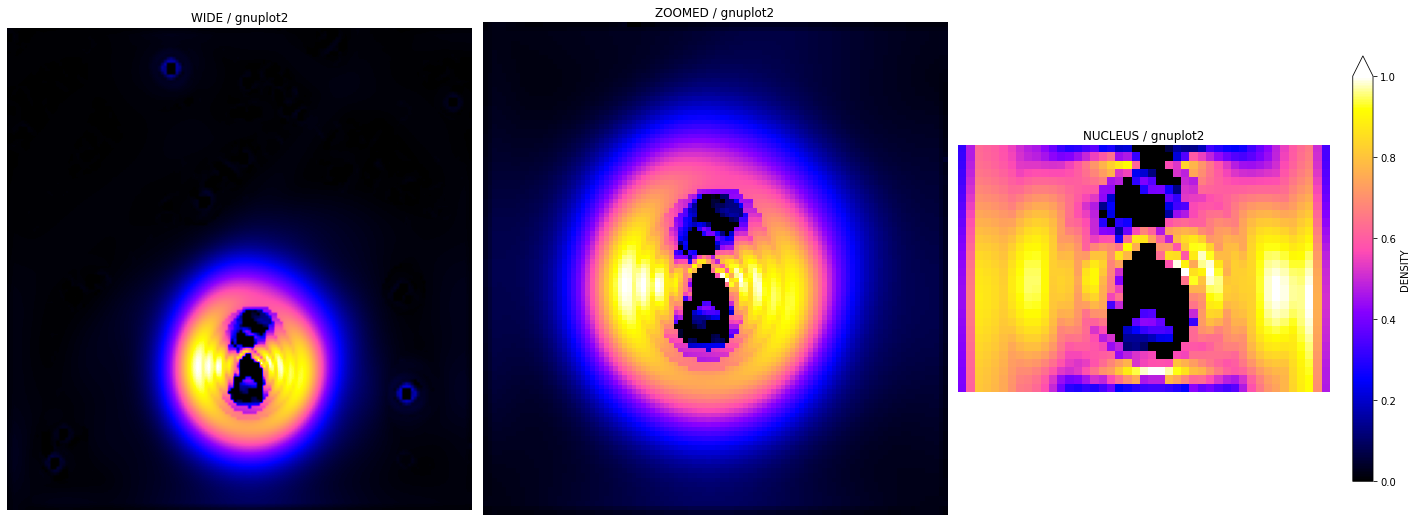

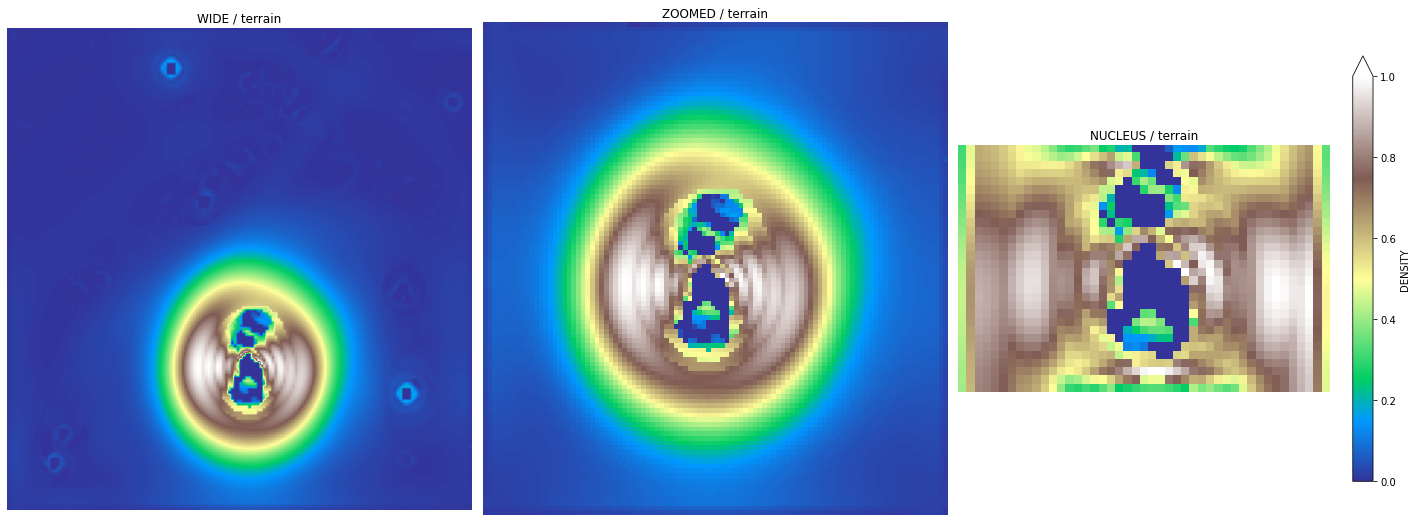

In [ ]:
for x_spec in SPECTRAL_LIST:
    
    figure,axis = plt.subplots(1,3,figsize=(20,20))
    
    axis[0].imshow(M_WIDE_SCALE_NI,cmap=x_spec)
    axis[0].set_title("WIDE" + " / "+ x_spec)
    axis[0].axis("off")
    
    axis[1].imshow(M_ZOOMED_SCALE_NI,cmap=x_spec)
    axis[1].set_title("ZOOMED" + " / "+ x_spec)
    axis[1].axis("off")
    
    DENSITY_FUNC = axis[2].imshow(M_NUCLEUS_SCALE_NI,cmap=x_spec)
    axis[2].set_title("NUCLEUS" + " / "+ x_spec)
    axis[2].axis("off")
    
    figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
    plt.tight_layout()
    plt.show()

In [ ]:
BM_WIDE_SCALE_NI = filters.meijering(WIDE_SCALE_NI,black_ridges=False)
BM_ZOOMED_SCALE_NI = filters.meijering(ZOOMED_SCALE_NI,black_ridges=False)
BM_NUCLEUS_SCALE_NI = filters.meijering(NUCLEUS_SCALE_NI,black_ridges=False)

BM_WIDE_SCALE_HST = filters.meijering(WIDE_SCALE_HST,black_ridges=False)
BM_ZOOMED_SCALE_HST = filters.meijering(ZOOMED_SCALE_HST,black_ridges=False)
BM_ZOOMED_X2_SCALE_HST = filters.meijering(ZOOMED_X2_SCALE_HST,black_ridges=False)
BM_ZOOMED_X3_SCALE_HST = filters.meijering(ZOOMED_X3_SCALE_HST,black_ridges=False)
BM_NUCLEUS_SCALE_HST = filters.meijering(NUCLEUS_SCALE_HST,black_ridges=False)

BM_WIDE_SCALE_NEWTON = filters.meijering(WIDE_SCALE_NEWTON,black_ridges=False)
BM_ZOOMED_SCALE_NEWTON = filters.meijering(ZOOMED_SCALE_NEWTON,black_ridges=False)
BM_NUCLEUS_SCALE_NEWTON = filters.meijering(NUCLEUS_SCALE_NEWTON,black_ridges=False)

BM_WIDE_SCALE_OM = filters.meijering(WIDE_SCALE_OM,black_ridges=False)
BM_ZOOMED_SCALE_OM = filters.meijering(ZOOMED_SCALE_OM,black_ridges=False)
BM_NUCLEUS_SCALE_OM = filters.meijering(NUCLEUS_SCALE_OM,black_ridges=False)

BM_ISO_CONS_SCALE = filters.meijering(ISO_CONS_SCALE,black_ridges=False)

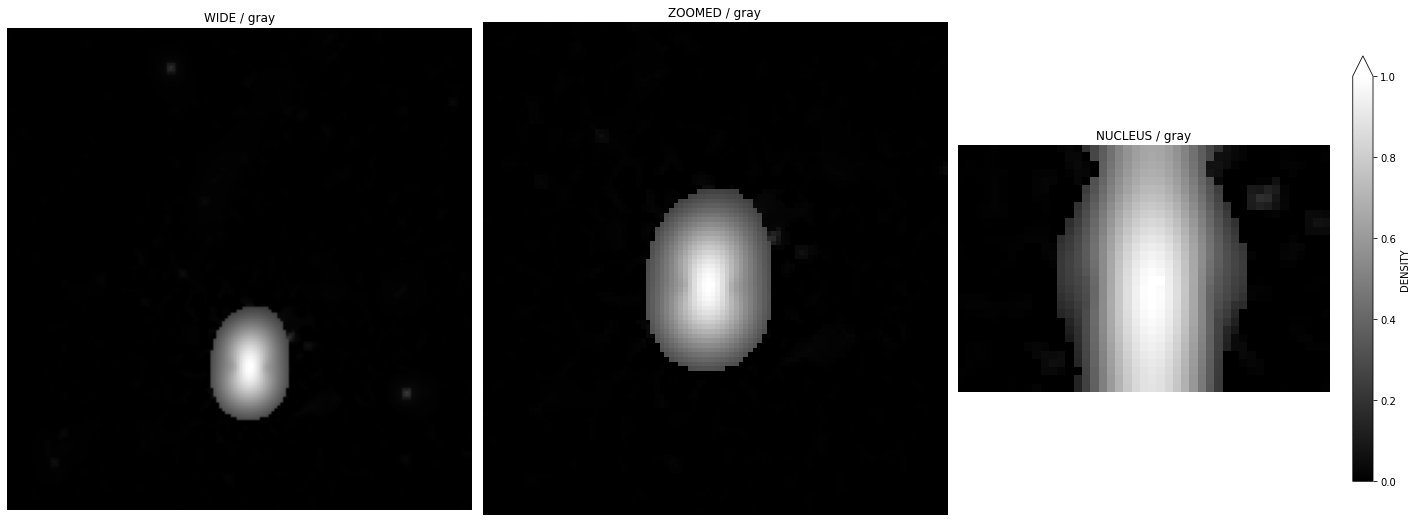

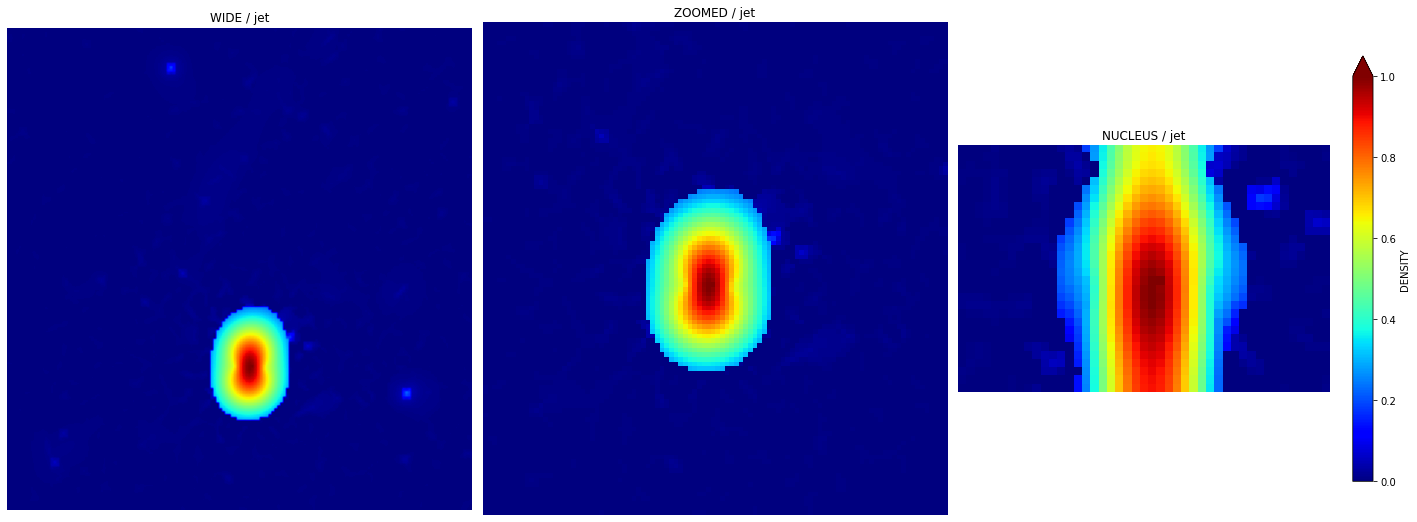

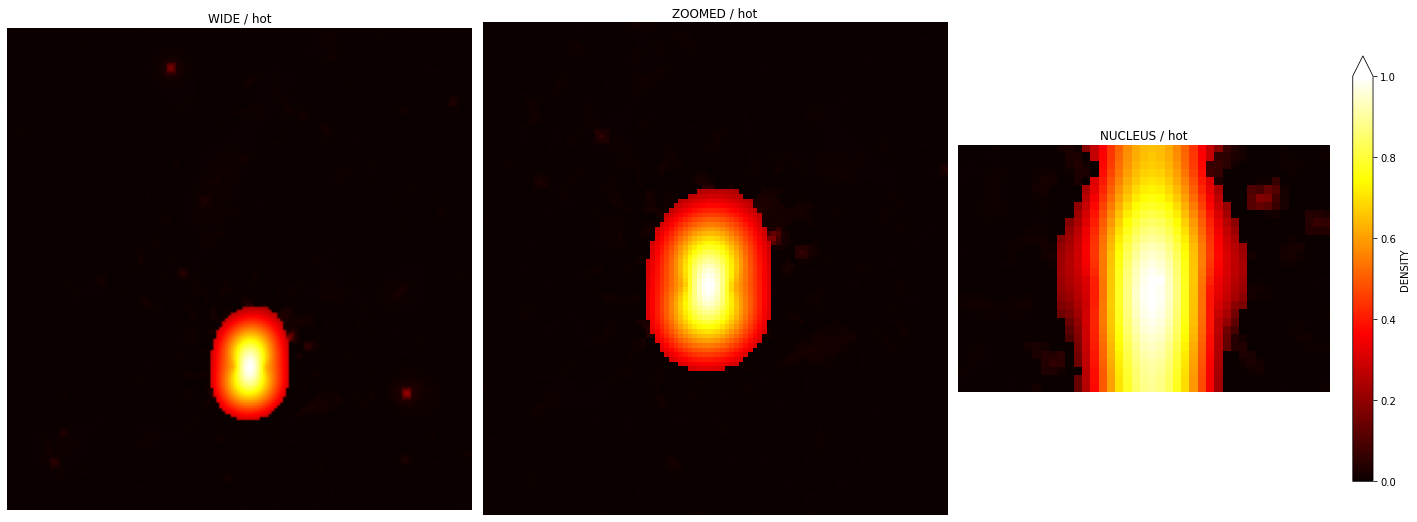

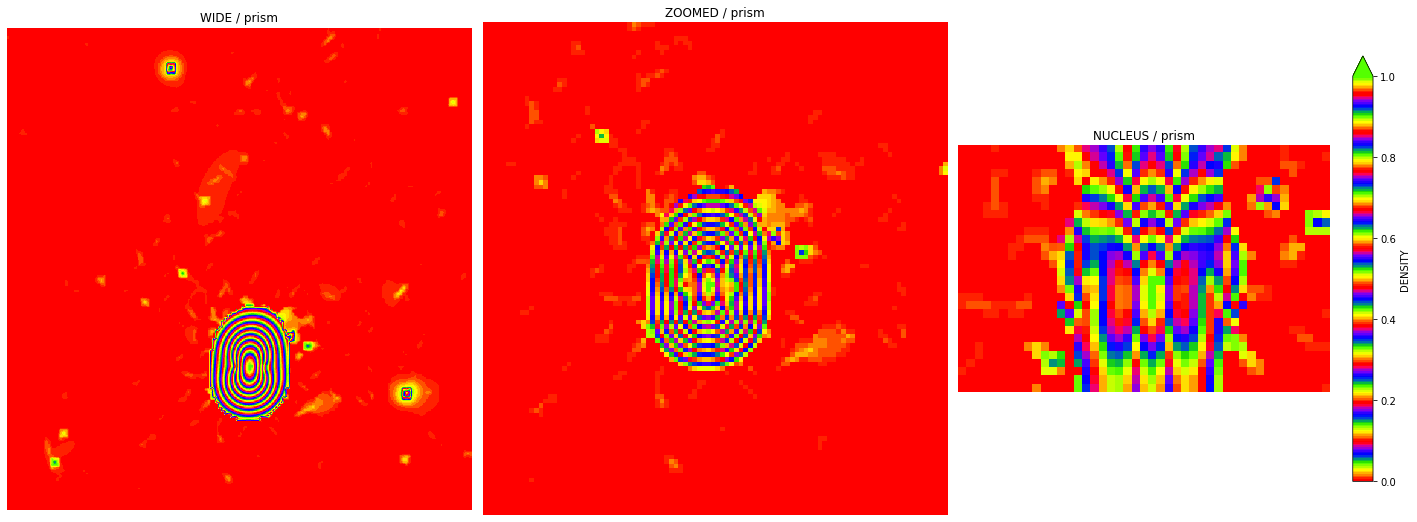

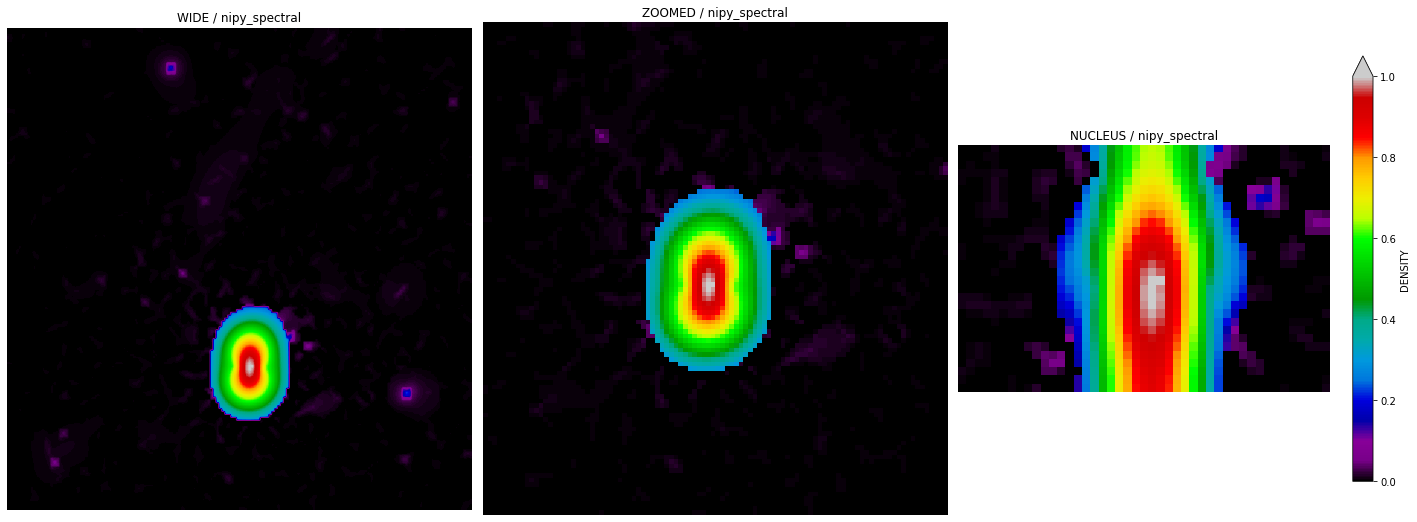

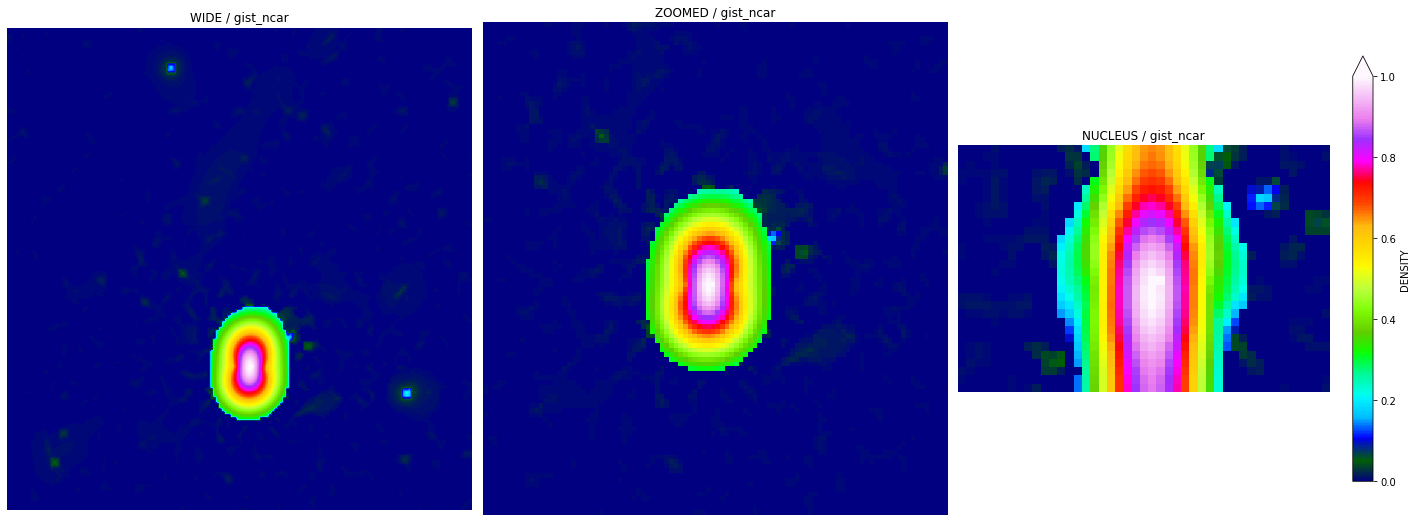

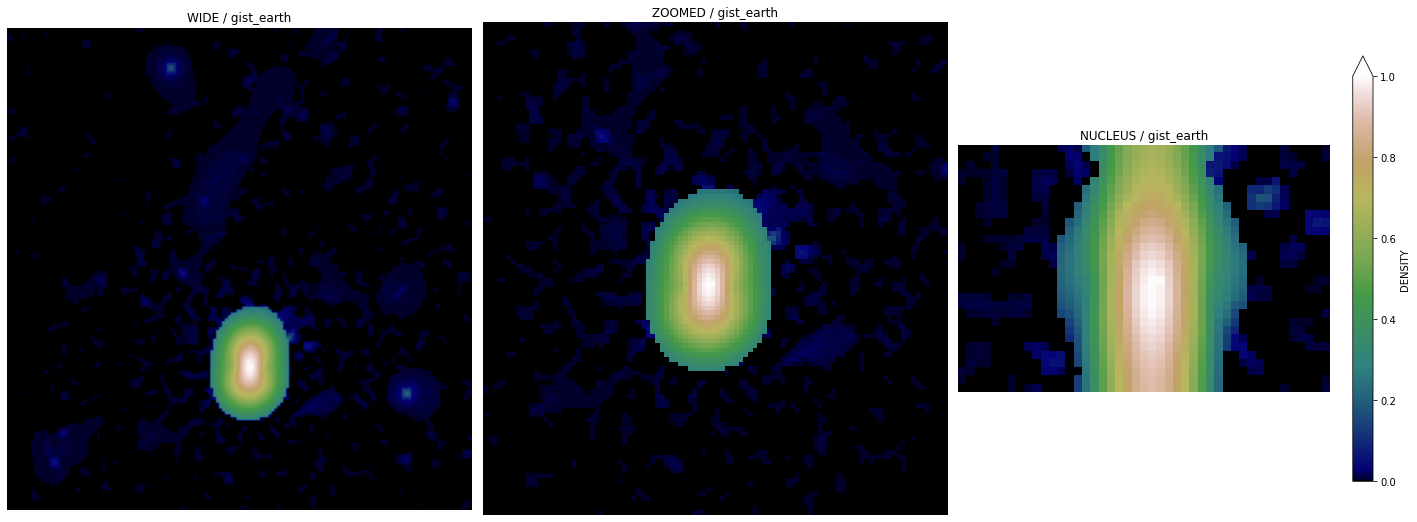

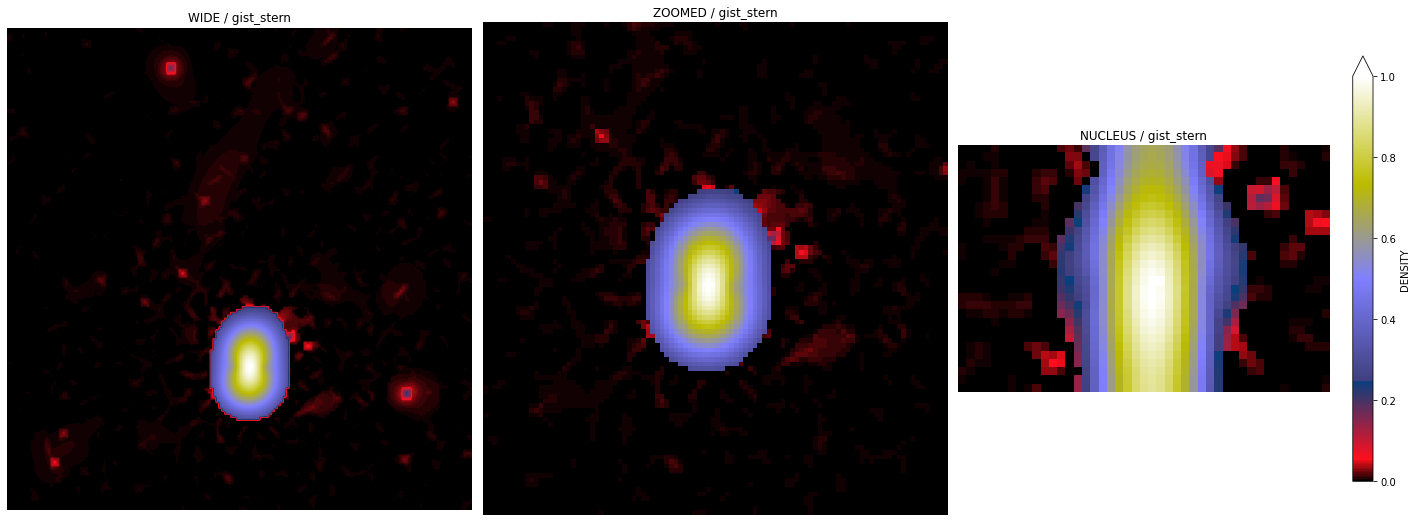

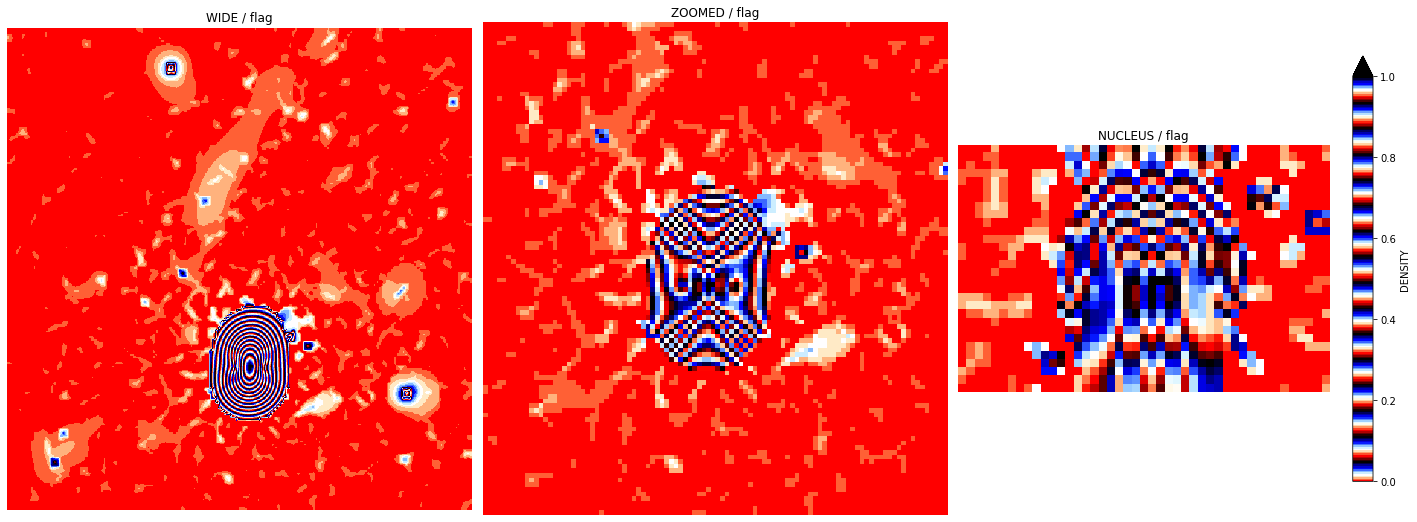

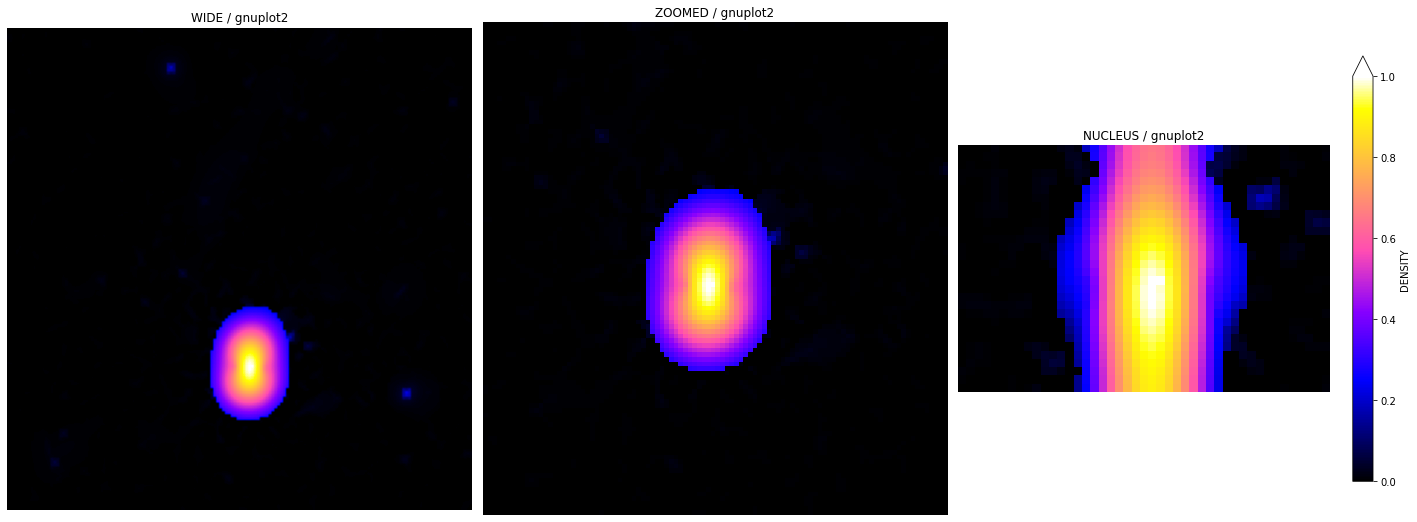

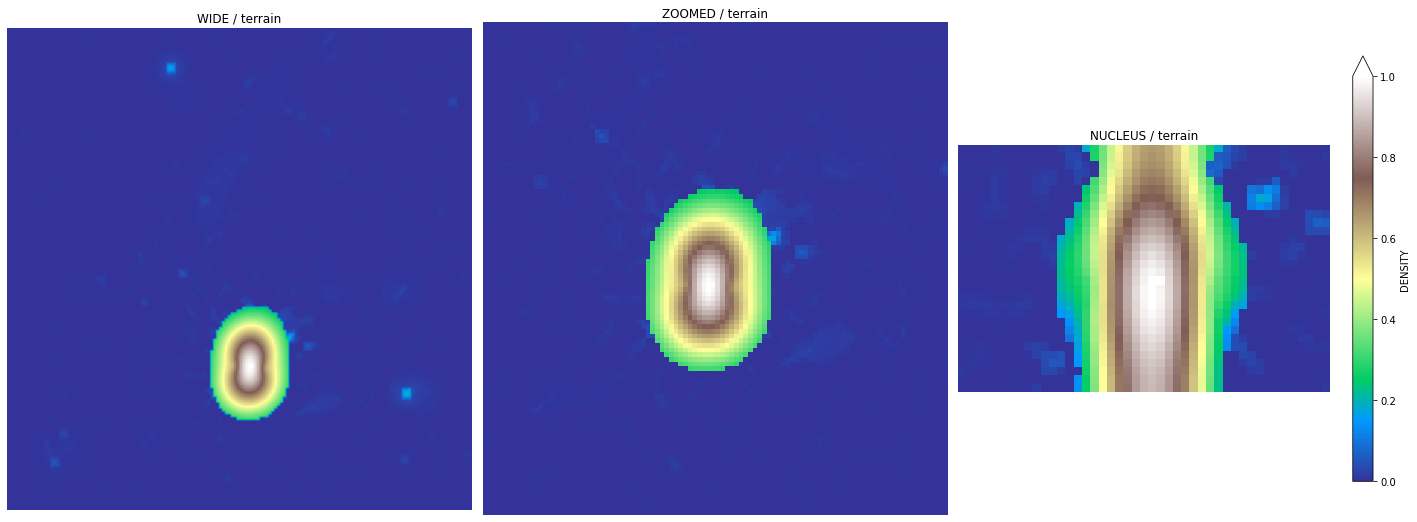

In [ ]:
for x_spec in SPECTRAL_LIST:
    
    figure,axis = plt.subplots(1,3,figsize=(20,20))
    
    axis[0].imshow(BM_WIDE_SCALE_NI,cmap=x_spec)
    axis[0].set_title("WIDE" + " / "+ x_spec)
    axis[0].axis("off")
    
    axis[1].imshow(BM_ZOOMED_SCALE_NI,cmap=x_spec)
    axis[1].set_title("ZOOMED" + " / "+ x_spec)
    axis[1].axis("off")
    
    DENSITY_FUNC = axis[2].imshow(BM_NUCLEUS_SCALE_NI,cmap=x_spec)
    axis[2].set_title("NUCLEUS" + " / "+ x_spec)
    axis[2].axis("off")
    
    figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
    plt.tight_layout()
    plt.show()

#### 3.  Roberts’ Cross (Negative Diagonal)
```
skimage.filters.roberts_neg_diag
```
Find the cross edges of an image using the Roberts’ Cross operator. The kernel is applied to the input image to produce separate measurements of the gradient component one orientation.

#### Parameters
```
image2-D array
Image to process.

mask2-D array, optional
An optional mask to limit the application to a certain area. Note that pixels surrounding masked regions are also masked to prevent masked regions from affecting the result.
```

#### Returns
```
output2-D array
The Robert’s edge map.
```

#### Applying on astronomical data

In [ ]:
R_WIDE_SCALE_NI = filters.roberts_neg_diag(WIDE_SCALE_NI)
R_ZOOMED_SCALE_NI = filters.roberts_neg_diag(ZOOMED_SCALE_NI)
R_NUCLEUS_SCALE_NI = filters.roberts_neg_diag(NUCLEUS_SCALE_NI)

R_WIDE_SCALE_HST = filters.roberts_neg_diag(WIDE_SCALE_HST)
R_ZOOMED_SCALE_HST = filters.roberts_neg_diag(ZOOMED_SCALE_HST)
R_ZOOMED_X2_SCALE_HST = filters.roberts_neg_diag(ZOOMED_X2_SCALE_HST)
R_ZOOMED_X3_SCALE_HST = filters.roberts_neg_diag(ZOOMED_X3_SCALE_HST)
R_NUCLEUS_SCALE_HST = filters.roberts_neg_diag(NUCLEUS_SCALE_HST)

R_WIDE_SCALE_NEWTON = filters.roberts_neg_diag(WIDE_SCALE_NEWTON)
R_ZOOMED_SCALE_NEWTON = filters.roberts_neg_diag(ZOOMED_SCALE_NEWTON)
R_NUCLEUS_SCALE_NEWTON = filters.roberts_neg_diag(NUCLEUS_SCALE_NEWTON)

R_WIDE_SCALE_OM = filters.roberts_neg_diag(WIDE_SCALE_OM)
R_ZOOMED_SCALE_OM = filters.roberts_neg_diag(ZOOMED_SCALE_OM)
R_NUCLEUS_SCALE_OM = filters.roberts_neg_diag(NUCLEUS_SCALE_OM)

R_ISO_CONS_SCALE = filters.roberts_neg_diag(ISO_CONS_SCALE)

#### Visualizing the filtered image

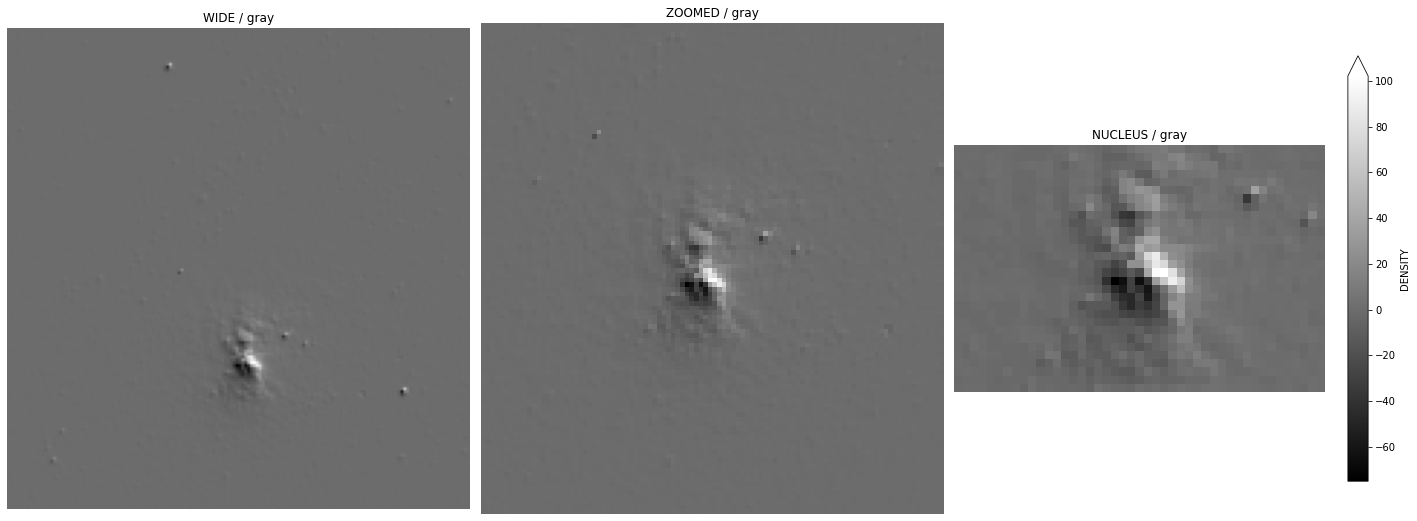

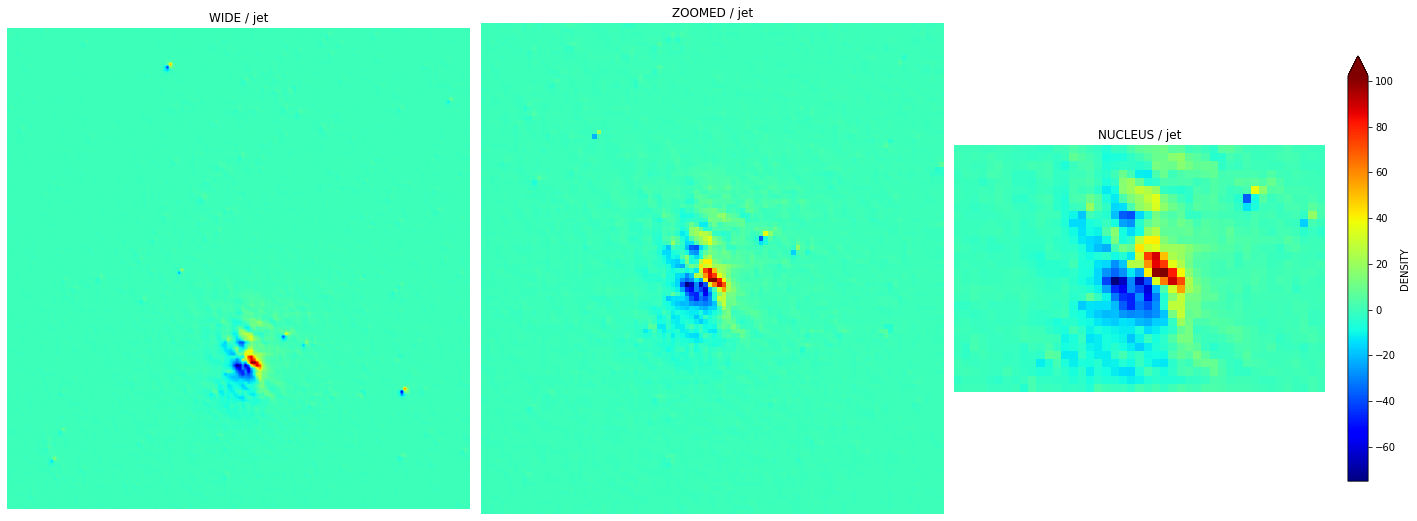

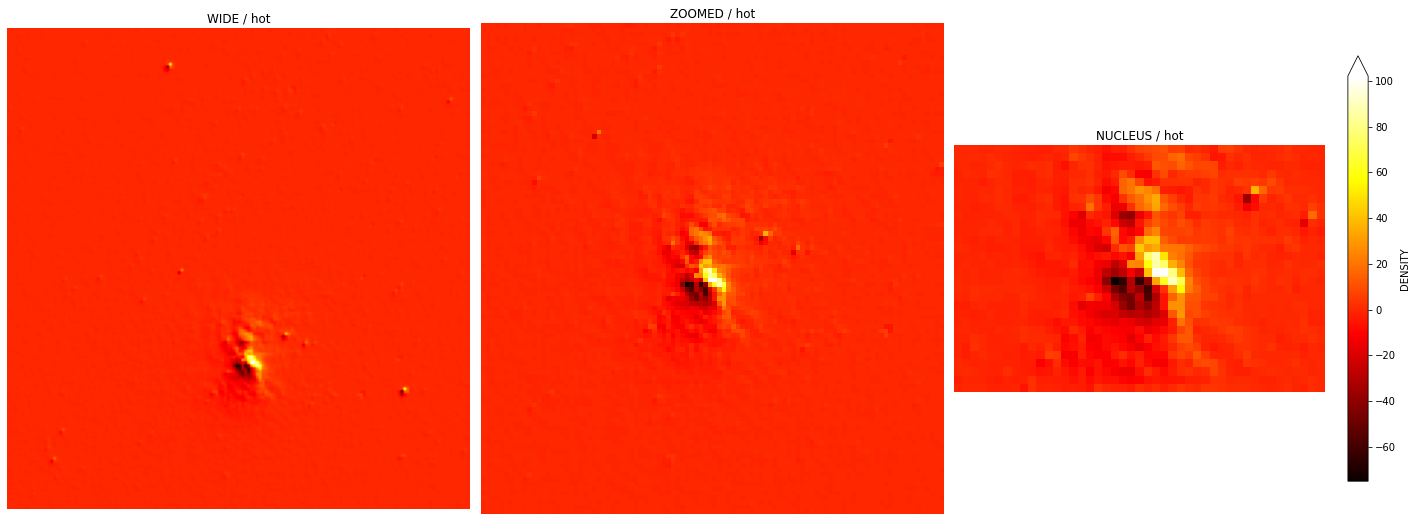

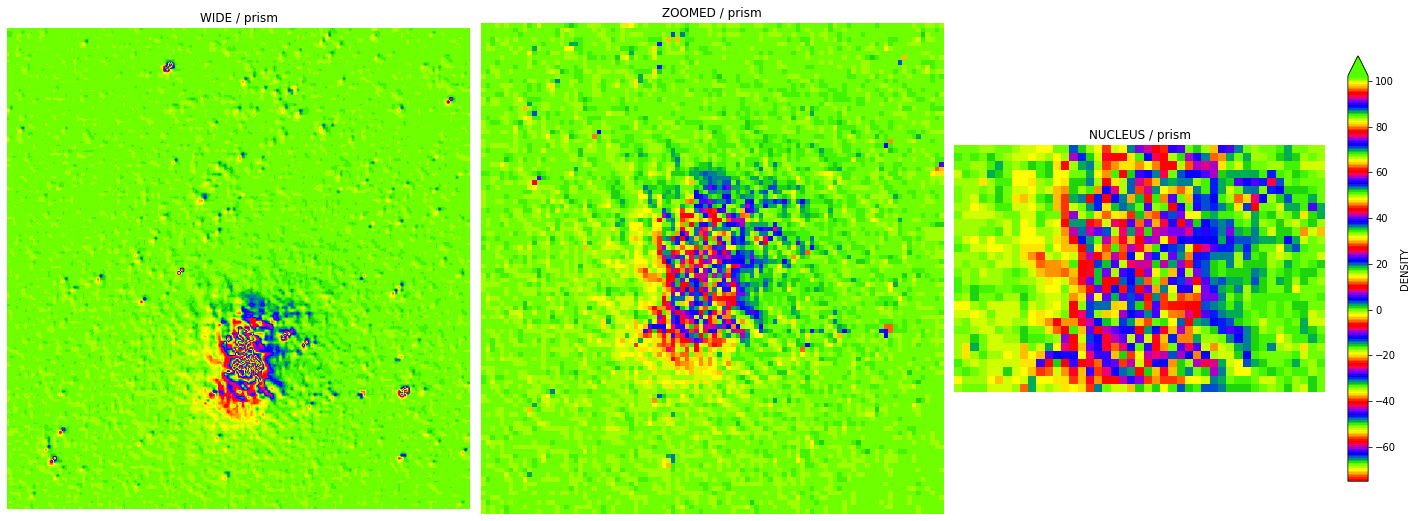

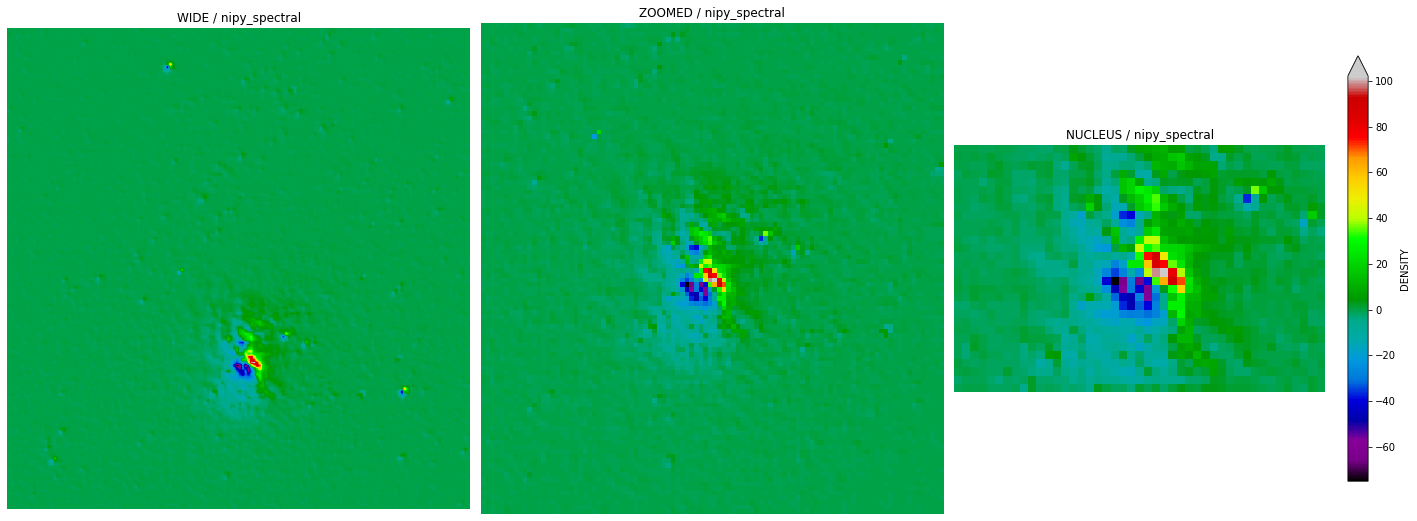

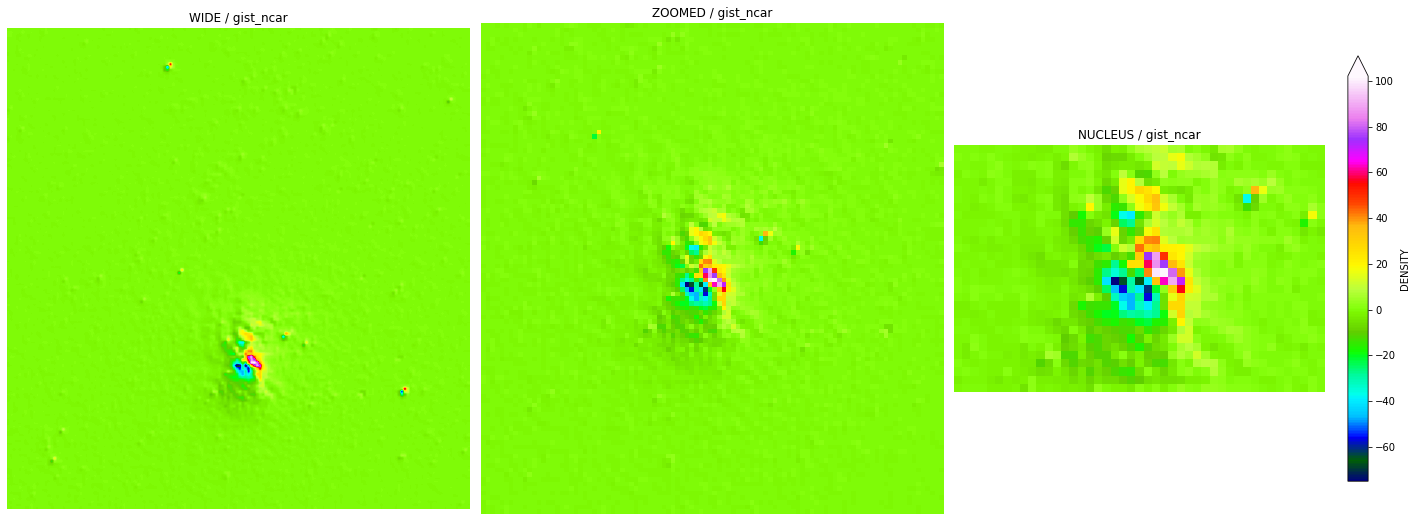

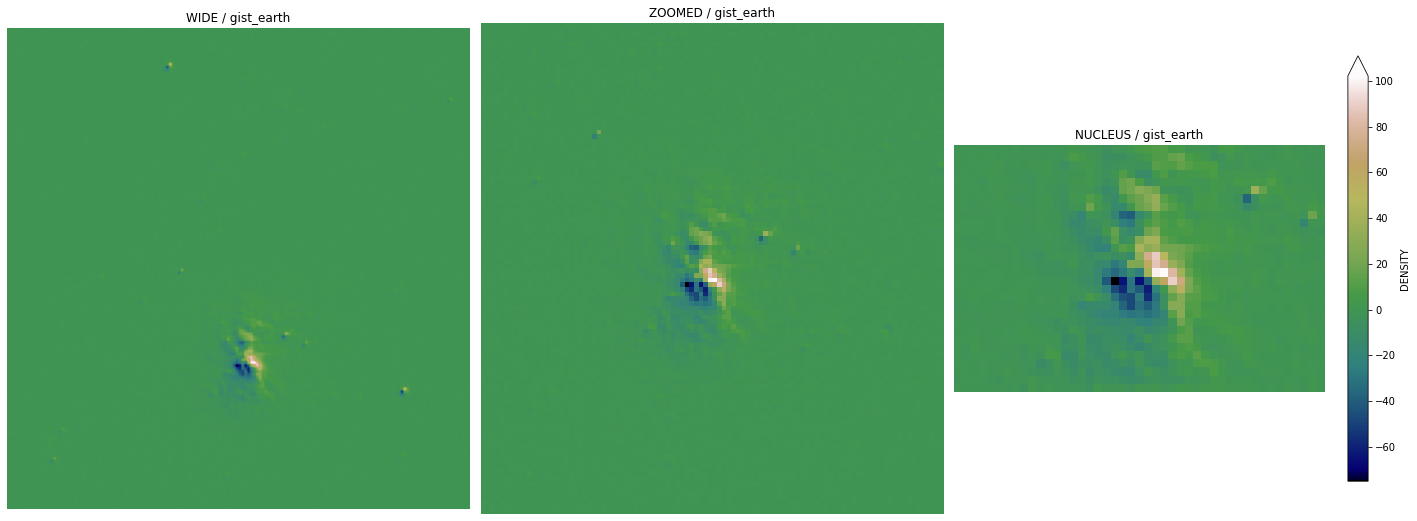

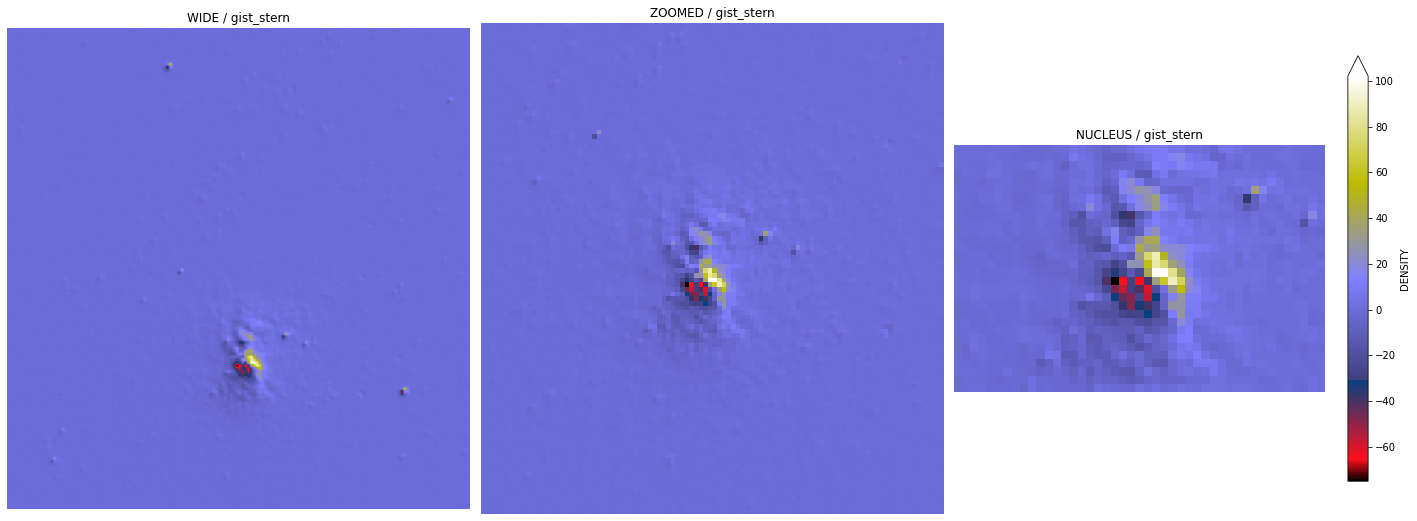

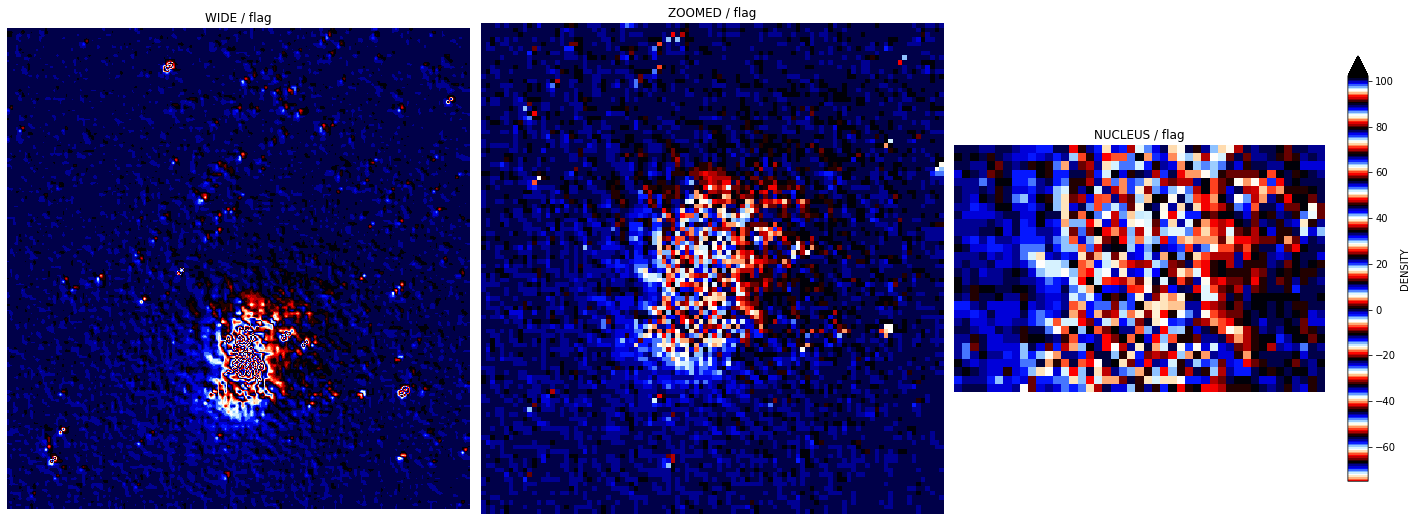

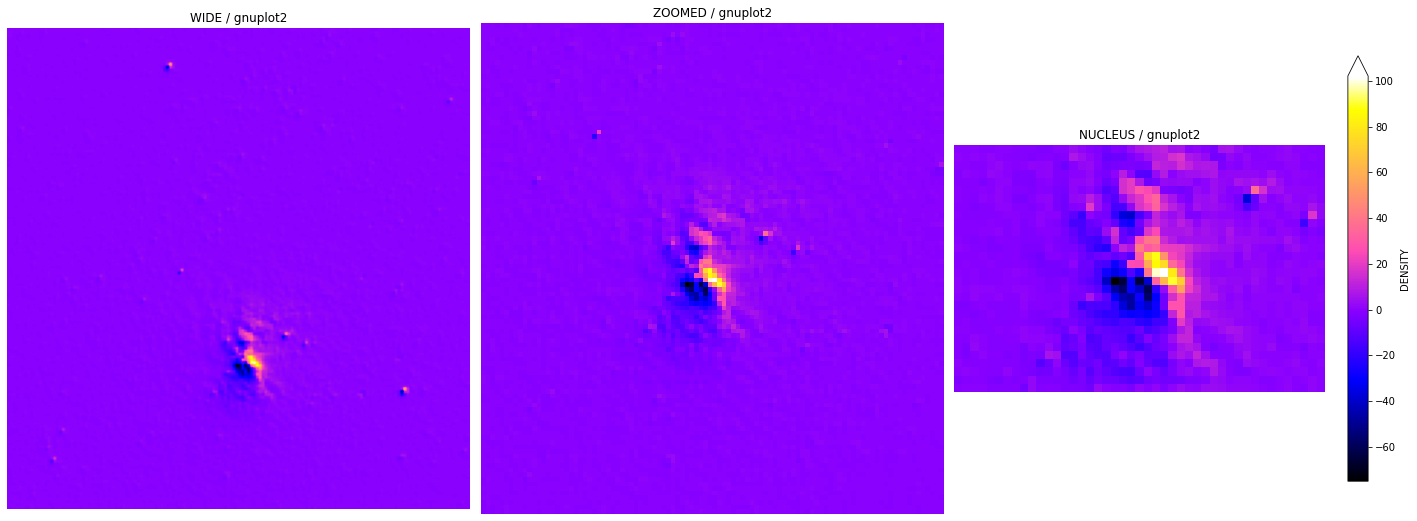

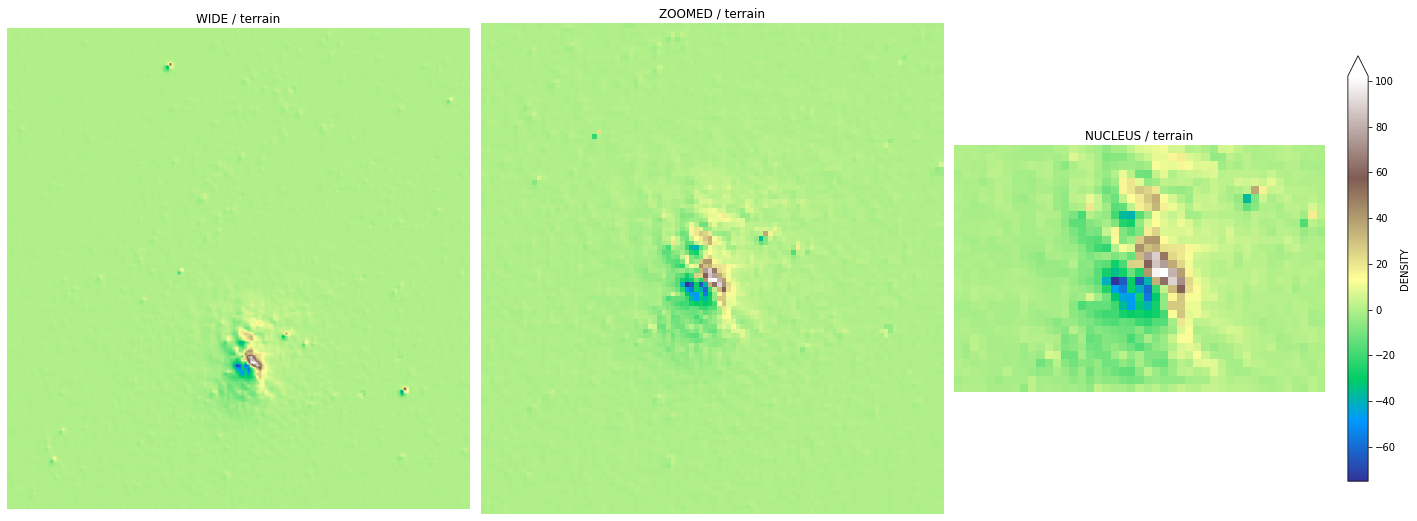

In [ ]:
for x_spec in SPECTRAL_LIST:
    
    figure,axis = plt.subplots(1,3,figsize=(20,20))
    
    axis[0].imshow(R_WIDE_SCALE_NI,cmap=x_spec)
    axis[0].set_title("WIDE" + " / "+ x_spec)
    axis[0].axis("off")
    
    axis[1].imshow(R_ZOOMED_SCALE_NI,cmap=x_spec)
    axis[1].set_title("ZOOMED" + " / "+ x_spec)
    axis[1].axis("off")
    
    DENSITY_FUNC = axis[2].imshow(R_NUCLEUS_SCALE_NI,cmap=x_spec)
    axis[2].set_title("NUCLEUS" + " / "+ x_spec)
    axis[2].axis("off")
    
    figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
    plt.tight_layout()
    plt.show()

## Conclusion

A quick wrap up of this notebook,

* Fireworks Galaxy (i.e. NGC 6946)
* Astronomical data and its preferred format FITS
* Libraries required for Astronomical data exploration
* Loading Astronomical data
* EDA on Astronomical images using different types of Edge detection filters on various new spectral maps

The next Notebook will cover specific techniques for particular feature observation using the help of slicing, filters and spectral maps!

## Thanks for reading so far! Feel free to fork this notebook and add your own inputs and experiment! Happy EDA!